In [ ]:
import os
import subprocess
# Check if the repository has already been cloned
repo_name = "Digital-Egypt-Pioneers-Initiative-DEPI-"
repo_url = "https://github.com/youssef-223/Digital-Egypt-Pioneers-Initiative-DEPI-.git"

In [ ]:
if os.path.exists(repo_name):
        print(f"Repository '{repo_name}' already exists. Pulling latest changes.")
        subprocess.run(['git', '-C', "Digital-Egypt-Pioneers-Initiative-DEPI-", 'pull'], check=True)
else:
        print(f"Cloning repository '{repo_name}'.")
        subprocess.run(["git", "clone", repo_url])


Repository 'Digital-Egypt-Pioneers-Initiative-DEPI-' already exists. Pulling latest changes.


In [ ]:
# Change directory to the desired folder
target_dir = os.path.join(repo_name, 'Microsoft_Malware_Kaagle')

if os.path.exists(target_dir):
        os.chdir(target_dir)
        print(f"Changed directory to {target_dir}.")
else:
        print(f"Target directory '{target_dir}' not found.")

Changed directory to Digital-Egypt-Pioneers-Initiative-DEPI-/Microsoft_Malware_Kaagle.


In [ ]:
from google.colab import files

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


from scipy.stats import randint, uniform, zscore, skew


from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, VarianceThreshold
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, roc_curve, auc

import mlflow
import subprocess
from pyngrok import ngrok, conf
import getpass
import mlflow
import mlflow.sklearn


from utils import *


In [ ]:
# ! pip install -q kaggle
# files.upload()

# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle competitions download -c microsoft-malware-prediction

# ! unzip "microsoft-malware-prediction.zip"

# Step1: EDA

## Reading and Describe

In [ ]:
# train_data = load_random_sample('train.csv', sample_size=10000, random_seed=42)


In [ ]:
# train_data.to_csv('random_train',index=False)

In [ ]:
train_data = pd.read_csv('random_train.csv')

In [ ]:
num_features = train_data.shape[1]
print(f"Number of features: {num_features}")
training_examples = train_data.shape[0]
print(f"Number of training examples: {training_examples}")

Number of features: 83
Number of training examples: 10000


In [ ]:
train_data.head()

MachineIdentifier   ProductName EngineVersion  \
0  0000d2c33cde94a58c7d265850b87a67  win8defender   1.1.15200.1   
1  00098f9e3bc24337b4605a9b041e3636  win8defender   1.1.15200.1   
2  000c02b627970574ed9fcf4f09d6e1f1  win8defender   1.1.15300.5   
3  000edc601b0d7e6a56e51811e3cd024e  win8defender   1.1.15200.1   
4  000fee2a9961f2974d49164e3e57d713  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.275.1209.0       0               7.0                 0   
1  4.18.1807.18075   1.275.423.0       0               7.0                 0   
2  4.18.1807.18075  1.275.1140.0       0               7.0                 0   
3  4.18.1807.18075  1.275.1187.0       0               7.0                 0   
4  4.18.1807.18075  1.273.1490.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  ...  \
0                        NaN                    45157.0  ...   
1                        NaN                    53447.0  ...   
2                        NaN                    68585.0  ...   
3                        NaN                    53447.0  ...   
4                        NaN                    53447.0  ...   

   Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                           45538.0                           0   
1                           10814.0                           0   
2                           46596.0                           1   
3                           33095.0                           0   
4                           20107.0                           0   

   Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
0                      NaN                     0.0                      0   
1                      NaN                     0.0                      0   
2                      NaN                     0.0                      0   
3                      NaN                     0.0                      0   
4                      0.0                     0.0                      0   

   Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                    0                                      0.0           0.0   
1                    0                                      0.0           0.0   
2                    0                                      0.0           1.0   
3                    0                                      0.0           0.0   
4                    0                                      0.0           0.0   

  Wdft_RegionIdentifier HasDetections  
0                  15.0             0  
1                   8.0             0  
2                   7.0             1  
3                  10.0             1  
4                   7.0             1  

[5 rows x 83 columns]

In [ ]:
train_data.describe().T

count          mean  \
IsBeta                                             10000.0  0.000000e+00   
RtpStateBitfield                                    9965.0  6.858705e+00   
IsSxsPassiveMode                                   10000.0  1.570000e-02   
DefaultBrowsersIdentifier                            497.0  1.691235e+03   
AVProductStatesIdentifier                           9959.0  4.759631e+04   
AVProductsInstalled                                 9959.0  1.338086e+00   
AVProductsEnabled                                   9959.0  1.022392e+00   
HasTpm                                             10000.0  9.886000e-01   
CountryIdentifier                                  10000.0  1.075180e+02   
CityIdentifier                                      9614.0  8.132409e+04   
OrganizationIdentifier                              6968.0  2.485032e+01   
GeoNameIdentifier                                  10000.0  1.691515e+02   
LocaleEnglishNameIdentifier                        10000.0  1.235560e+02   
OsBuild                                            10000.0  1.573992e+04   
OsSuite                                            10000.0  5.736241e+02   
IsProtected                                         9959.0  9.457777e-01   
AutoSampleOptIn                                    10000.0  1.000000e-04   
PuaMode                                                0.0           NaN   
SMode                                               9396.0  7.449979e-04   
IeVerIdentifier                                     9935.0  1.267196e+02   
Firewall                                            9900.0  9.773737e-01   
UacLuaenable                                        9987.0  9.930910e-01   
Census_OEMNameIdentifier                            9907.0  2.198150e+03   
Census_OEMModelIdentifier                           9902.0  2.385639e+05   
Census_ProcessorCoreCount                           9949.0  3.986230e+00   
Census_ProcessorManufacturerIdentifier              9949.0  4.524173e+00   
Census_ProcessorModelIdentifier                     9949.0  2.369448e+03   
Census_PrimaryDiskTotalCapacity                     9939.0  5.147891e+05   
Census_SystemVolumeTotalCapacity                    9939.0  3.797797e+05   
Census_HasOpticalDiskDrive                         10000.0  7.640000e-02   
Census_TotalPhysicalRAM                             9919.0  6.110354e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches   9947.0  1.671819e+01   
Census_InternalPrimaryDisplayResolutionHorizontal   9947.0  1.546127e+03   
Census_InternalPrimaryDisplayResolutionVertical     9947.0  8.958915e+02   
Census_InternalBatteryNumberOfCharges               9674.0  1.144555e+09   
Census_OSBuildNumber                               10000.0  1.584608e+04   
Census_OSBuildRevision                             10000.0  9.424781e+02   
Census_OSInstallLanguageIdentifier                  9918.0  1.462281e+01   
Census_OSUILocaleIdentifier                        10000.0  6.038920e+01   
Census_IsPortableOperatingSystem                   10000.0  8.000000e-04   
Census_IsFlightingInternal                          1672.0  0.000000e+00   
Census_IsFlightsDisabled                            9827.0  0.000000e+00   
Census_ThresholdOptIn                               3588.0  0.000000e+00   
Census_FirmwareManufacturerIdentifier               9807.0  4.030125e+02   
Census_FirmwareVersionIdentifier                    9836.0  3.296430e+04   
Census_IsSecureBootEnabled                         10000.0  4.861000e-01   
Census_IsWIMBootEnabled                             3595.0  0.000000e+00   
Census_IsVirtualDevice                              9988.0  5.306368e-03   
Census_IsTouchEnabled                              10000.0  1.208000e-01   
Census_IsPenCapable                                10000.0  3.460000e-02   
Census_IsAlwaysOnAlwaysConnectedCapable             9906.0  5.481526e-02   
Wdft_IsGamer                                        9623.0  2.773563e-01   
Wdft_RegionIdentifier    

In [ ]:
train_data.describe(include=['object'])

MachineIdentifier   ProductName EngineVersion  \
count                              10000         10000         10000   
unique                             10000             3            35   
top     0000d2c33cde94a58c7d265850b87a67  win8defender   1.1.15200.1   
freq                                   1          9898          4377   

             AppVersion  AvSigVersion   Platform Processor     OsVer  \
count             10000         10000      10000     10000     10000   
unique               58          1593          4         2         4   
top     4.18.1807.18075  1.273.1420.0  windows10       x64  10.0.0.0   
freq               5795           123       9662      9086      9678   

       OsPlatformSubRelease                                OsBuildLab  ...  \
count                 10000                                      9999  ...   
unique                    9                                       201  ...   
top                     rs4  17134.1.amd64fre.rs4_release.180410-1804  ...   
freq                   4430                                      4115  ...   

       Census_OSVersion Census_OSArchitecture Census_OSBranch  \
count             10000                 10000           10000   
unique              190                     2              13   
top      10.0.17134.228                 amd64     rs4_release   
freq               1619                  9090            4532   

       Census_OSEdition Census_OSSkuName Census_OSInstallTypeName  \
count             10000            10000                    10000   
unique               15               14                        9   
top                Core             CORE               UUPUpgrade   
freq               3912             3911                     2902   

       Census_OSWUAutoUpdateOptionsName Census_GenuineStateName  \
count                             10000                   10000   
unique                                6                       4   
top                            FullAuto              IS_GENUINE   
freq                               4455                    8837   

       Census_ActivationChannel Census_FlightRing  
count                     10000             10000  
unique                        6                 7  
top                      Retail            Retail  
freq                       5351              9414  

[4 rows x 29 columns]

## Identifying numerical and categroical columns

In [ ]:
cat_cols = get_cat_cols(train_data,10,show_unique_values = False)

# Get the remaining columns that are not in cat_cols
num_cols = list(set(train_data.columns) - set(cat_cols))

# Print results
print(f"Categorical columns with few unique values: {cat_cols}")
print(f"Number of categorical features: {len(cat_cols)}/{num_features}")
print(f"Numerical columns (rest of the columns): {num_cols}")
print(f"Number of numerical features: {len(num_cols)}/{num_features}")

Categorical columns with few unique values: ['Census_ProcessorClass', 'AppVersion', 'Census_OSWUAutoUpdateOptionsName', 'UacLuaenable', 'Census_IsWIMBootEnabled', 'Census_OSInstallTypeName', 'Census_ThresholdOptIn', 'Platform', 'Census_ActivationChannel', 'AutoSampleOptIn', 'AvSigVersion', 'Census_IsFlightsDisabled', 'SMode', 'Census_IsTouchEnabled', 'Census_IsVirtualDevice', 'OsBuildLab', 'RtpStateBitfield', 'HasDetections', 'Census_InternalBatteryType', 'OsVer', 'Census_OSVersion', 'IsProtected', 'Census_IsPortableOperatingSystem', 'Census_IsAlwaysOnAlwaysConnectedCapable', 'OsPlatformSubRelease', 'Census_GenuineStateName', 'MachineIdentifier', 'Census_MDC2FormFactor', 'PuaMode', 'Census_OSSkuName', 'SmartScreen', 'Census_IsSecureBootEnabled', 'OsSuite', 'Census_OSArchitecture', 'Census_IsPenCapable', 'SkuEdition', 'Census_FlightRing', 'IsSxsPassiveMode', 'Census_HasOpticalDiskDrive', 'HasTpm', 'AVProductsInstalled', 'EngineVersion', 'Census_PrimaryDiskTypeName', 'AVProductsEnabled',

## Handle Null values

In [ ]:
null_summary(train_data)

Total No. of Missing Values  \
MachineIdentifier                                                  0   
ProductName                                                        0   
EngineVersion                                                      0   
AppVersion                                                         0   
AvSigVersion                                                       0   
...                                                              ...   
Census_IsPenCapable                                                0   
Census_IsAlwaysOnAlwaysConnectedCapable                           94   
Wdft_IsGamer                                                     377   
Wdft_RegionIdentifier                                            377   
HasDetections                                                      0   

                                         Percentage of Missing Values  
MachineIdentifier                                                0.00  
ProductName                                                      0.00  
EngineVersion                                                    0.00  
AppVersion                                                       0.00  
AvSigVersion                                                     0.00  
...                                                               ...  
Census_IsPenCapable                                              0.00  
Census_IsAlwaysOnAlwaysConnectedCapable                          0.94  
Wdft_IsGamer                                                     3.77  
Wdft_RegionIdentifier                                            3.77  
HasDetections                                                    0.00  

[83 rows x 2 columns]

In [ ]:
df_cleaned, cat_cols, num_cols = clean_and_impute_data(train_data, cat_cols, num_cols)

Dropped features with more than 50% missing values:
['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass', 'Census_InternalBatteryType', 'Census_IsFlightingInternal', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled']

Original DataFrame shape: (10000, 83)
New DataFrame shape: (10000, 76)


## Type Cast features for optimizing memory utilization

In [ ]:
# Print memory usage before optimization
print(">>Memory usage before optimization:")
memory_before = df_cleaned.memory_usage(deep=True)
print(memory_before)

# Perform optimizations: Encode categorical columns
optimized_data = encode_categorical(df_cleaned.copy(), cat_cols)

# After encoding, downcast numerical columns
optimized_data = downcast_numerical(optimized_data)

# Print memory usage after optimization
print("-" * 100, "\n")
print(">>Memory usage after optimization:")
memory_after = optimized_data.memory_usage(deep=True)
print(memory_after)

# Calculate and print memory utilization changes
memory_before_total = memory_before.sum()
memory_after_total = memory_after.sum()

print("-" * 100, "\n")
print(f"Total memory usage before optimization: {memory_before_total / (1024 ** 2):.2f} MB")
print(f"Total memory usage after optimization: {memory_after_total / (1024 ** 2):.2f} MB")
print(f"Memory saved: {(memory_before_total - memory_after_total) / (1024 ** 2):.2f} MB")

# Calculate and print percentage of optimization
memory_saved = memory_before_total - memory_after_total
percentage_saved = (memory_saved / memory_before_total) * 100

print(f"Percentage of memory saved: {percentage_saved:.2f}%")


>>Memory usage before optimization:
Index                                         128
MachineIdentifier                          890000
ProductName                                689092
EngineVersion                              679999
AppVersion                                 715627
                                            ...  
Census_IsPenCapable                        321384
Census_IsAlwaysOnAlwaysConnectedCapable    320000
Wdft_IsGamer                               320000
Wdft_RegionIdentifier                       80000
HasDetections                              340128
Length: 77, dtype: int64
---------------------------------------------------------------------------------------------------- 

>>Memory usage after optimization:
Index                                        128
MachineIdentifier                          20000
ProductName                                10000
EngineVersion                              10000
AppVersion                                 10000
      

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:375: RuntimeWarning: invalid value encountered in cast
  new_result = trans(result).astype(dtype)


In [ ]:
# Make sure the casting went as required
def combine_dtypes(df1, df2):
    # Create a DataFrame that contains the dtypes of df1 and df2
    dtypes_df = pd.DataFrame({
        'df1_dtypes': df1.dtypes,
        'df2_dtypes': df2.dtypes
    })

    # Reset the index to have the column names as a column
    dtypes_df.reset_index(inplace=True)

    # Rename the columns
    dtypes_df.columns = ['Column', 'df_cleaned', 'optimized_data']

    return dtypes_df

# Example usage
dtypes_comparison = combine_dtypes(df_cleaned, optimized_data)
display(dtypes_comparison)

Column df_cleaned optimized_data
0                         MachineIdentifier     object          int16
1                               ProductName     object           int8
2                             EngineVersion     object           int8
3                                AppVersion     object           int8
4                              AvSigVersion     object          int16
..                                      ...        ...            ...
71                      Census_IsPenCapable     object           int8
72  Census_IsAlwaysOnAlwaysConnectedCapable     object           int8
73                             Wdft_IsGamer     object           int8
74                    Wdft_RegionIdentifier    float64        float64
75                            HasDetections     object           int8

[76 rows x 3 columns]

In [ ]:
show_uniqeness(optimized_data,['IsBeta'])

Column: 'IsBeta'
Number of unique values: 1
Unique values: [0]
---------------------------------------------------------------------------------------------------- 



In [ ]:
# Remove columns that are constant, and columns that are unique for each example (eg. ID)
for col in optimized_data.columns:
    if optimized_data[col].nunique() == 1:
        print(f"Column '{col}' is constant and will be removed.")
        optimized_data.drop(col, axis=1, inplace=True)
    elif optimized_data[col].nunique() == training_examples:
        print(f"Column '{col}' is unique and will be removed.")
        optimized_data.drop(col, axis=1, inplace=True)

Column 'MachineIdentifier' is unique and will be removed.
Column 'IsBeta' is constant and will be removed.
Column 'Census_IsFlightsDisabled' is constant and will be removed.


In [ ]:
# Approximately unique
optimized_data.drop(['AutoSampleOptIn','ProductName'],axis=1,inplace=True)

In [ ]:
optimized_data.describe()

EngineVersion    AppVersion  AvSigVersion  RtpStateBitfield  \
count   10000.000000  10000.000000   10000.00000      10000.000000   
mean       29.417400     24.605900    1012.10900          2.940800   
std         3.929137      8.049302     356.74108          0.424162   
min         0.000000      0.000000       0.00000          0.000000   
25%        30.000000     25.000000     807.00000          3.000000   
50%        30.000000     26.000000    1058.00000          3.000000   
75%        31.000000     26.000000    1262.00000          3.000000   
max        34.000000     57.000000    1592.00000          4.000000   

       IsSxsPassiveMode  AVProductStatesIdentifier  AVProductsInstalled  \
count      10000.000000               10000.000000         10000.000000   
mean           0.015700               47596.307059             0.336700   
std            0.124318               14247.694328             0.527978   
min            0.000000                 901.000000             0.000000   
25%            0.000000               47596.307059             0.000000   
50%            0.000000               53447.000000             0.000000   
75%            0.000000               53447.000000             1.000000   
max            1.000000               70262.000000             3.000000   

       AVProductsEnabled        HasTpm  CountryIdentifier  ...  \
count        10000.00000  10000.000000       10000.000000  ...   
mean             1.02230      0.988600         107.518000  ...   
std              0.17031      0.106166          63.335902  ...   
min              0.00000      0.000000           1.000000  ...   
25%              1.00000      1.000000          50.000000  ...   
50%              1.00000      1.000000          97.000000  ...   
75%              1.00000      1.000000         163.000000  ...   
max              4.00000      1.000000         222.000000  ...   

       Census_FirmwareManufacturerIdentifier  \
count                           10000.000000   
mean                              403.012542   
std                               219.535708   
min                                85.000000   
25%                               142.000000   
50%                               491.000000   
75%                               556.000000   
max                              1075.000000   

       Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
count                      10000.000000                10000.000000   
mean                       32964.298597                    0.486100   
std                        21001.898210                    0.499832   
min                           42.000000                    0.000000   
25%                        13186.500000                    0.000000   
50%                        33060.000000                    0.000000   
75%                        51941.500000                    1.000000   
max                        72090.000000                    1.000000   

       Census_IsVirtualDevice  Census_IsTouchEnabled  Census_IsPenCapable  \
count            10000.000000           10000.000000         10000.000000   
mean                 0.005300               0.120800             0.034600   
std                  0.072612               0.325911             0.182774   
min                  0.000000               0.000000             0.000000   
25%                  0.000000               0.000000             0.000000   
50%                  0.000000               0.000000             0.000000   
75%                  0.000000               0.000000             0.000000   
max                  1.000000               1.000000             1.000000   

       Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
count                              10000.00000  10000.000000   
mean                                   0.05430      0.266900   
std                                    0.22662      0.442362   
min                                    0.00000      0.000000   
25%               

## Data Visualization

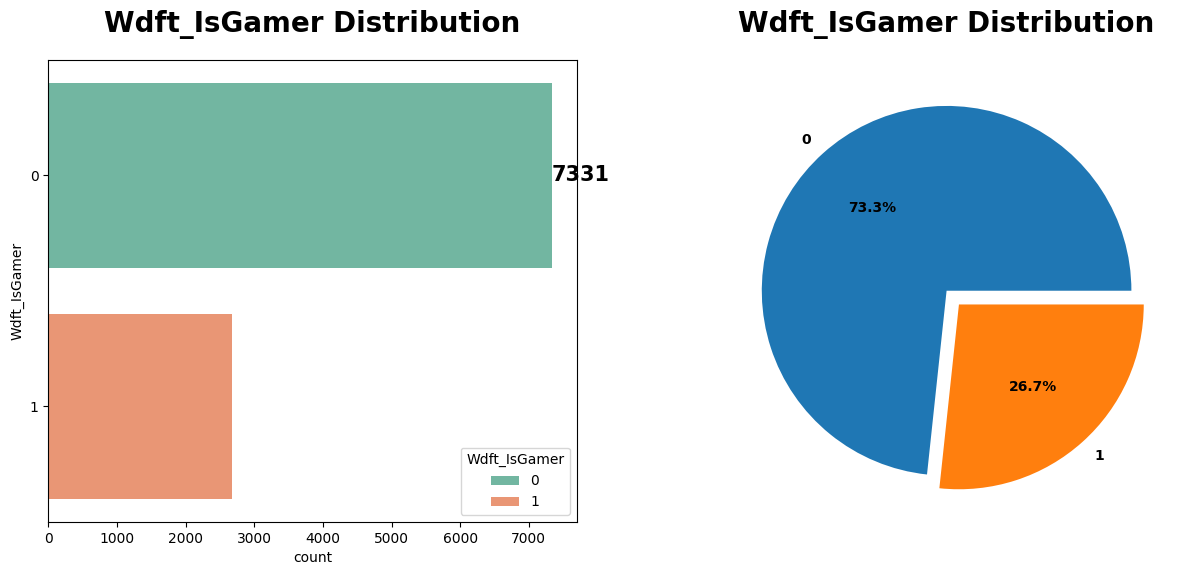

In [ ]:
# Count the values in the target column 'Wdft_IsGamer'
count = optimized_data["Wdft_IsGamer"].value_counts()

# Create a figure for the plots
plt.figure(figsize=(15,6))

# Bar plot for the 'Wdft_IsGamer' distribution
plt.subplot(1,2,1)
ax = sns.countplot(y="Wdft_IsGamer", data=optimized_data, hue="Wdft_IsGamer", palette="Set2")
ax.bar_label(ax.containers[0], fontweight="black", size=15)
plt.title("Wdft_IsGamer Distribution", fontweight="black", size=20, pad=20)

# Pie chart for the 'Wdft_IsGamer' distribution
plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%", colors=sns.set_palette("Set2"),
        textprops={"fontweight": "black"}, explode=[0, 0.1])
plt.title("Wdft_IsGamer Distribution", fontweight="black", size=20, pad=20)

# Show the plot
plt.show()


Showing 73 graphs


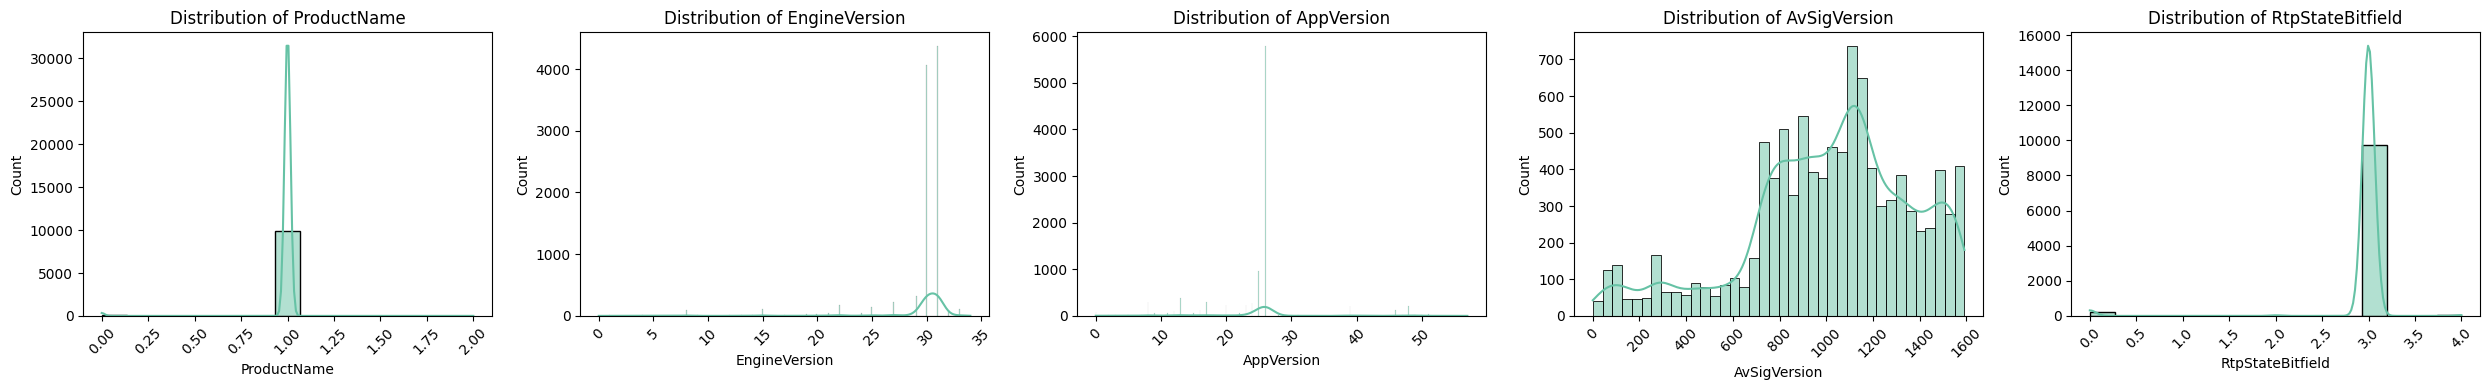

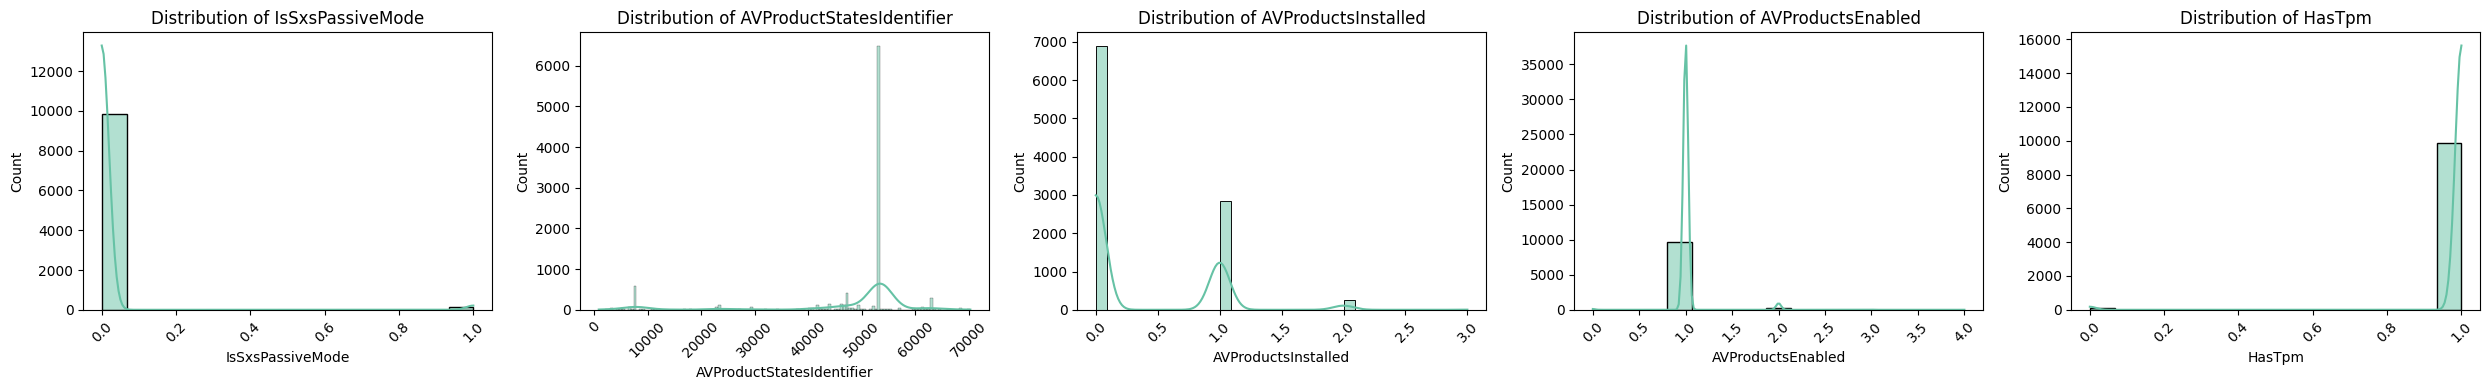

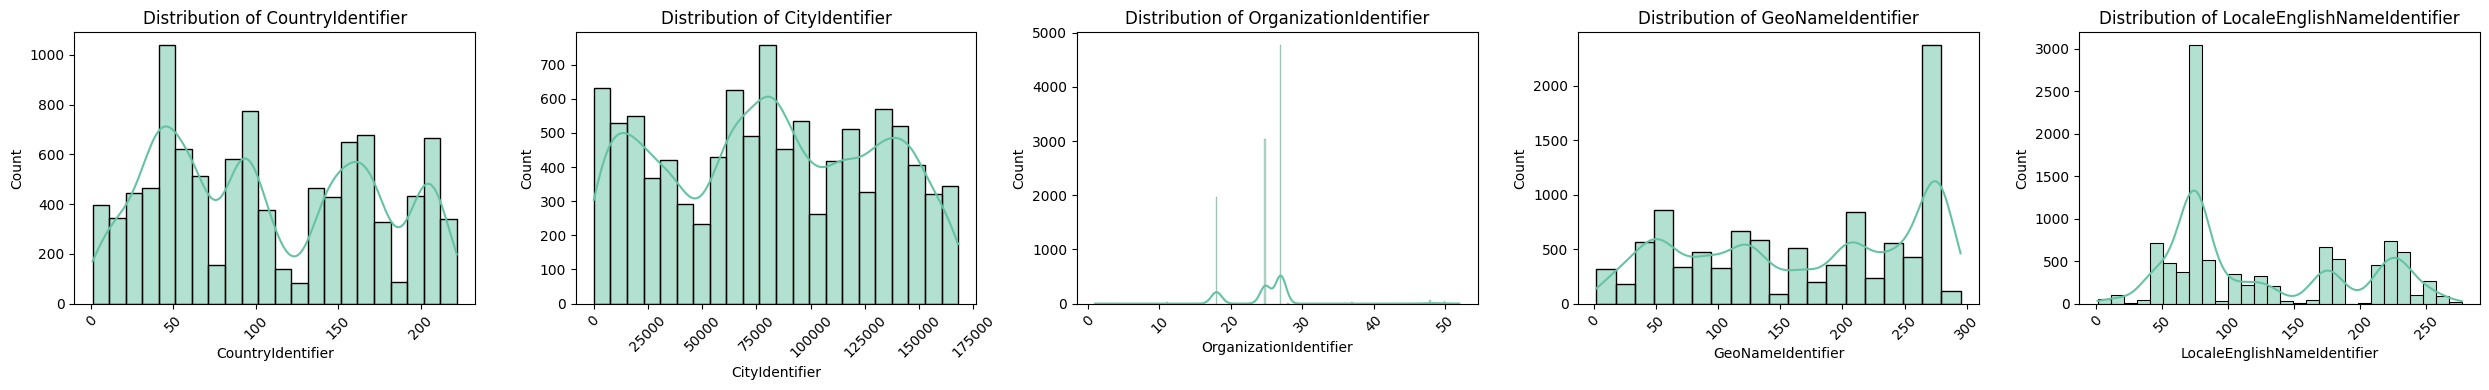

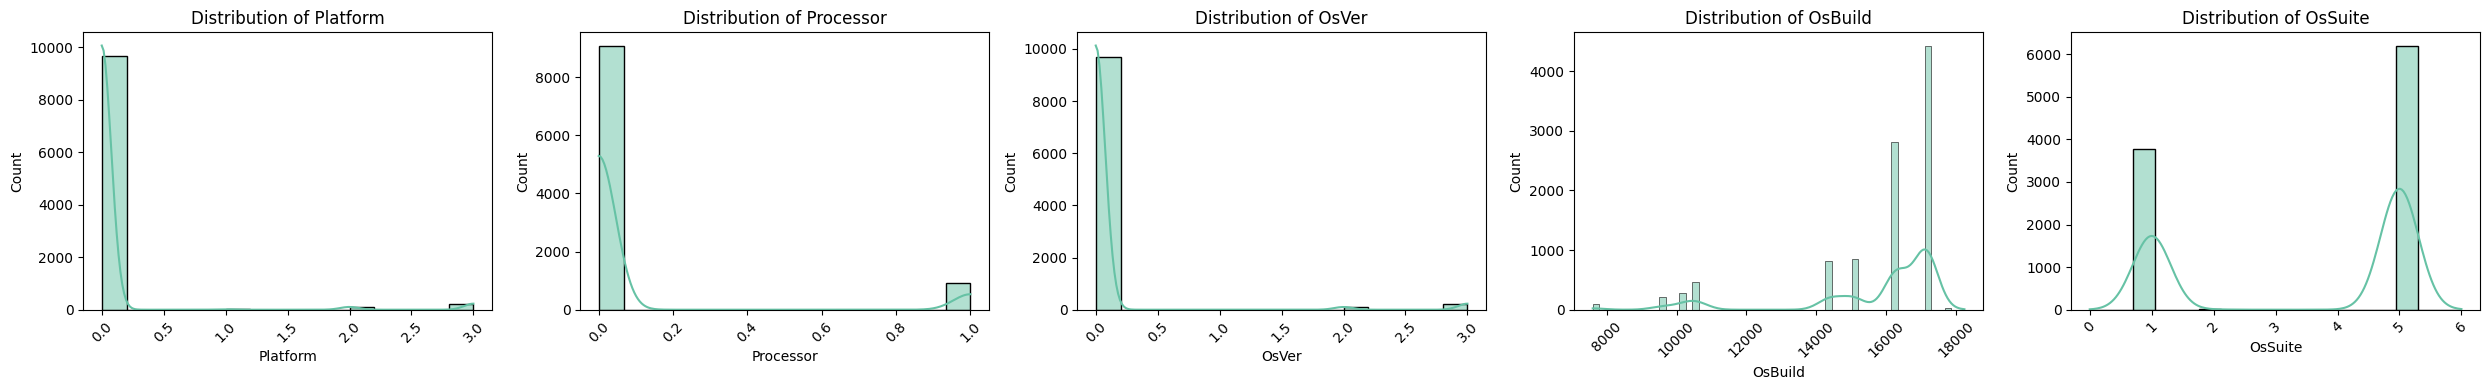

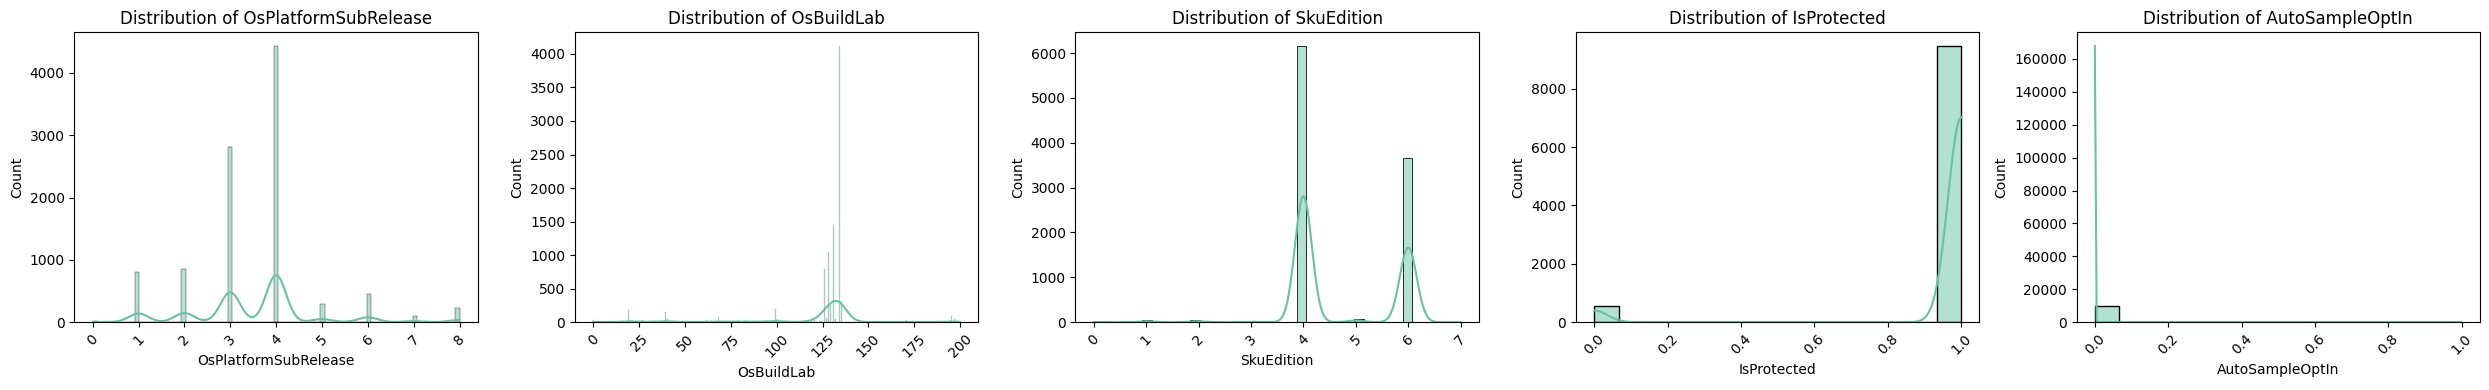

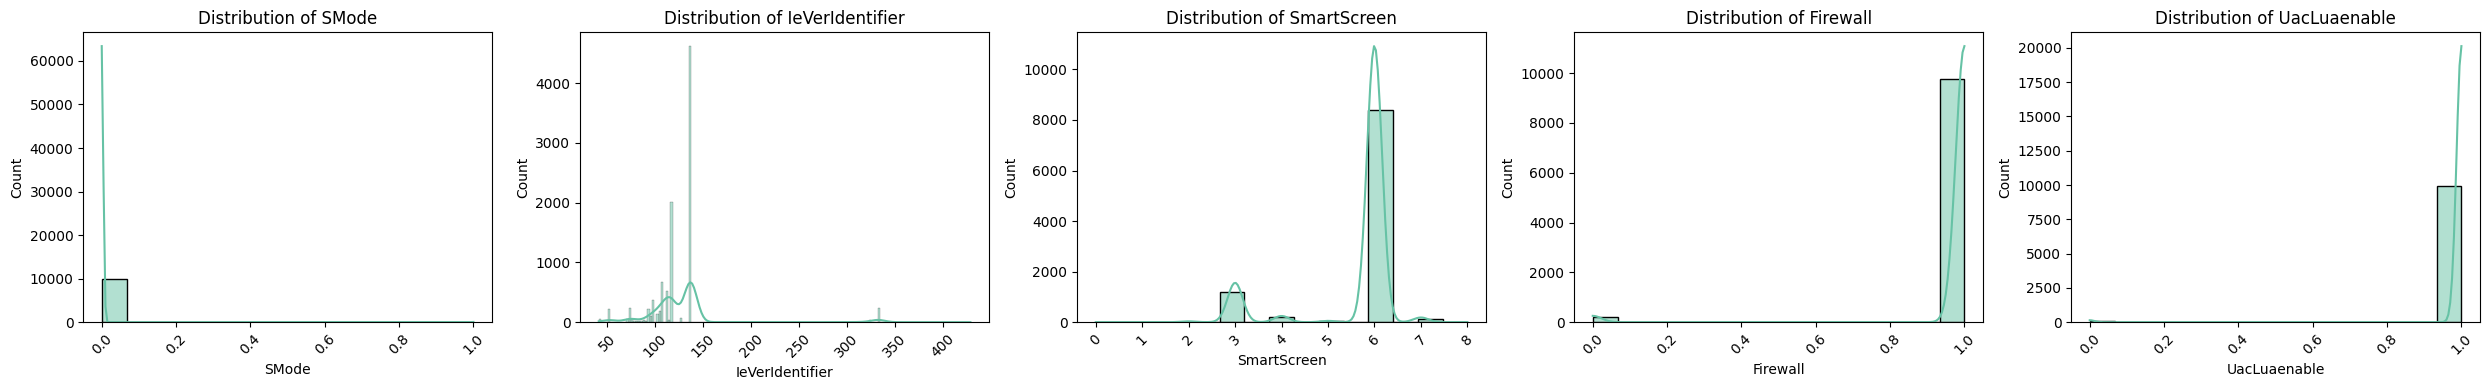

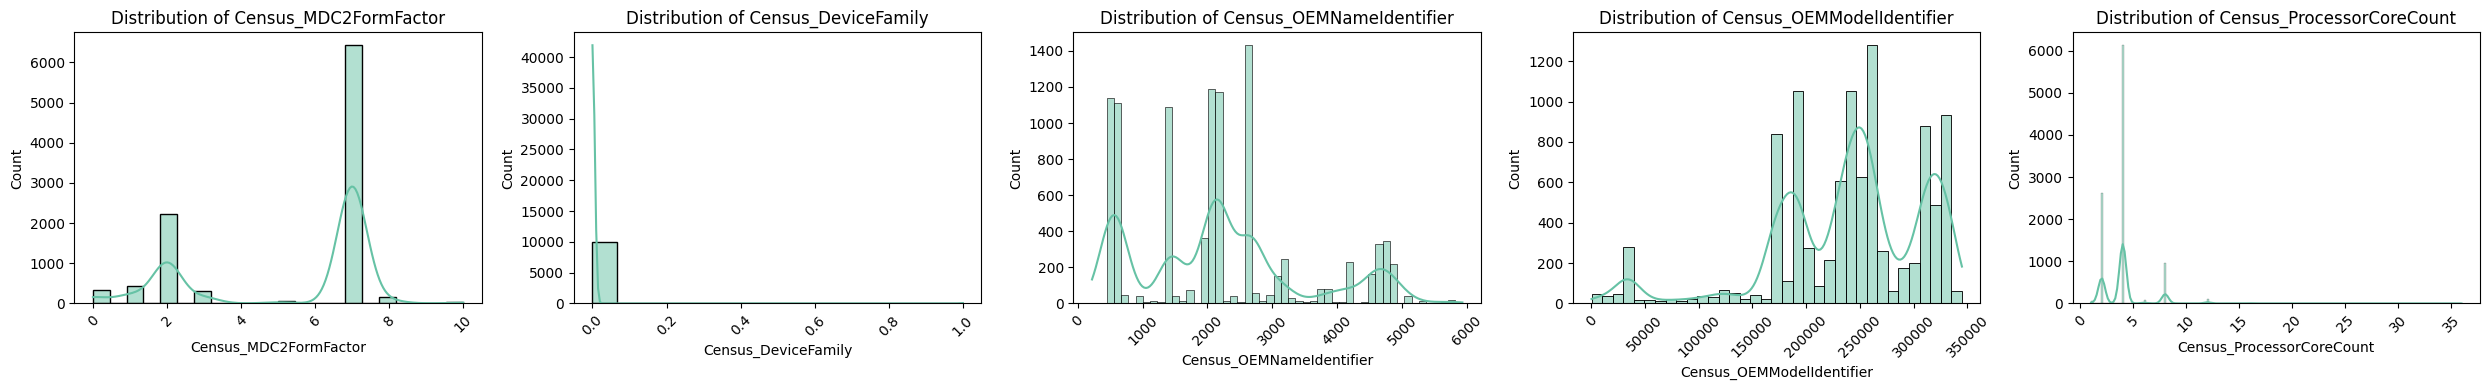

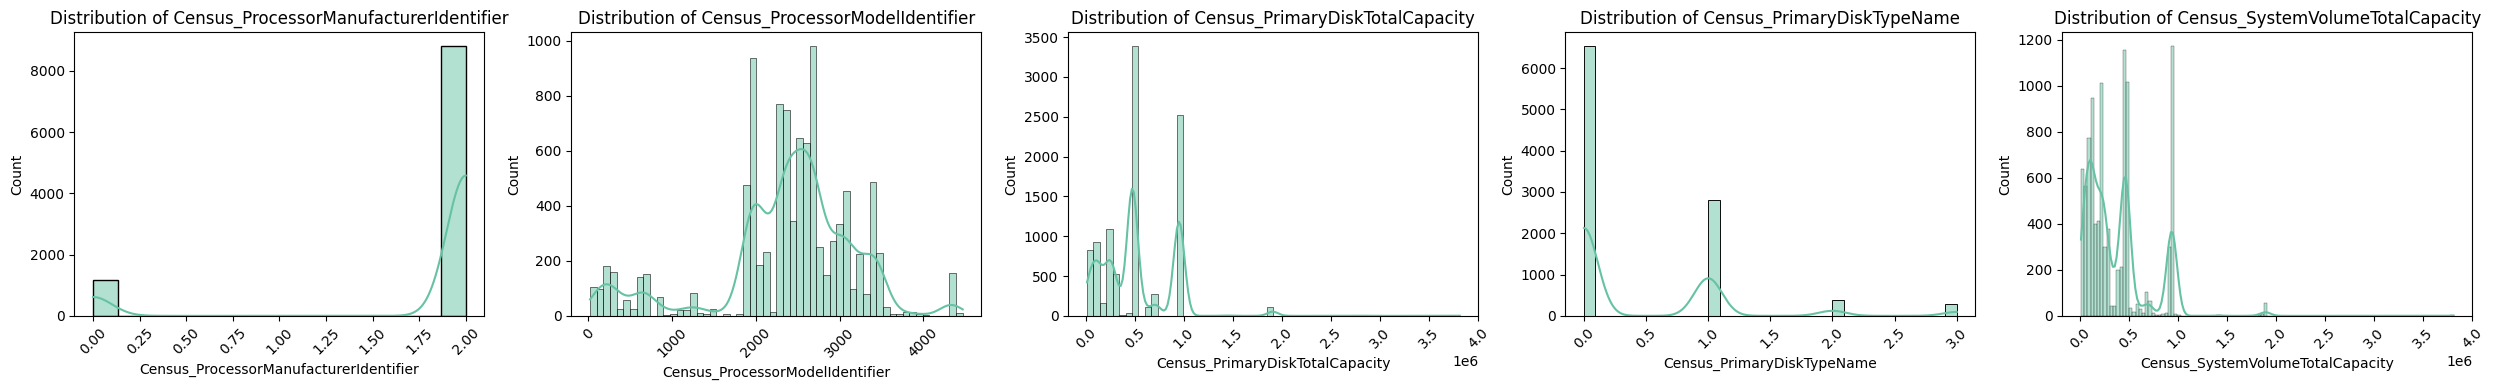

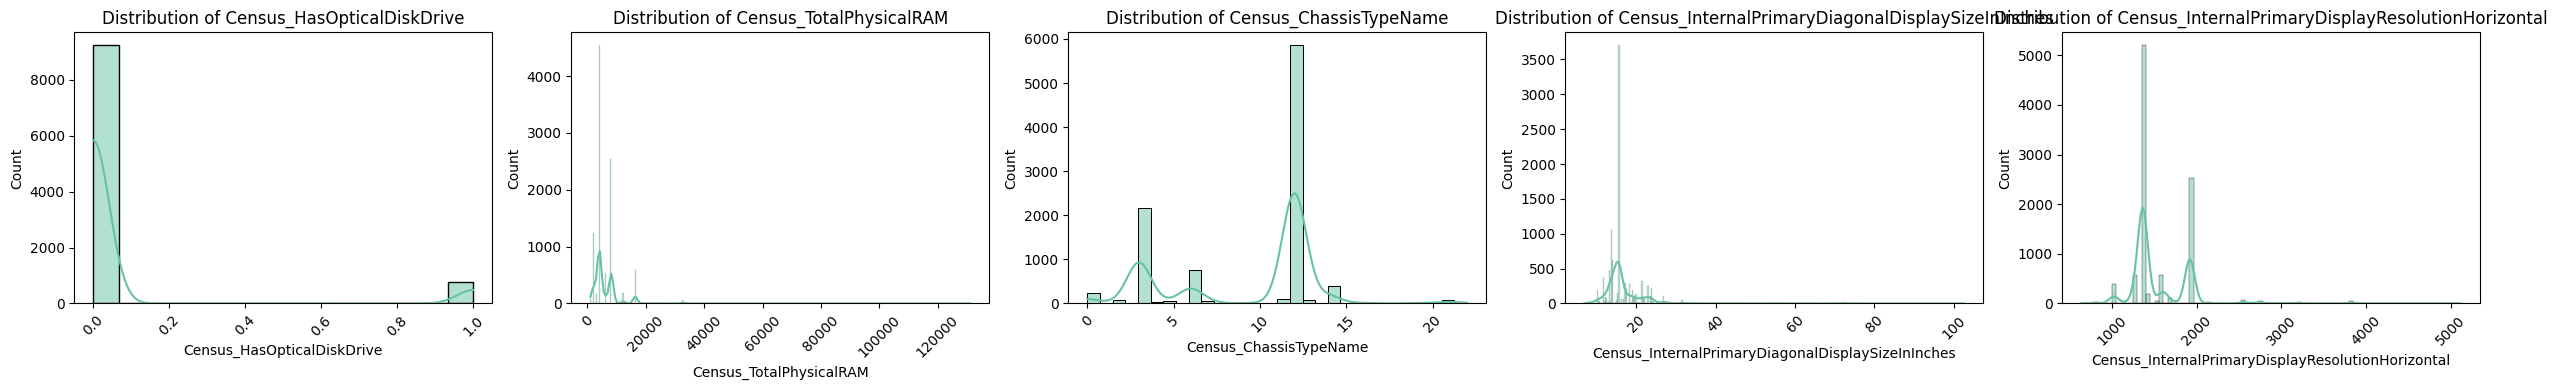

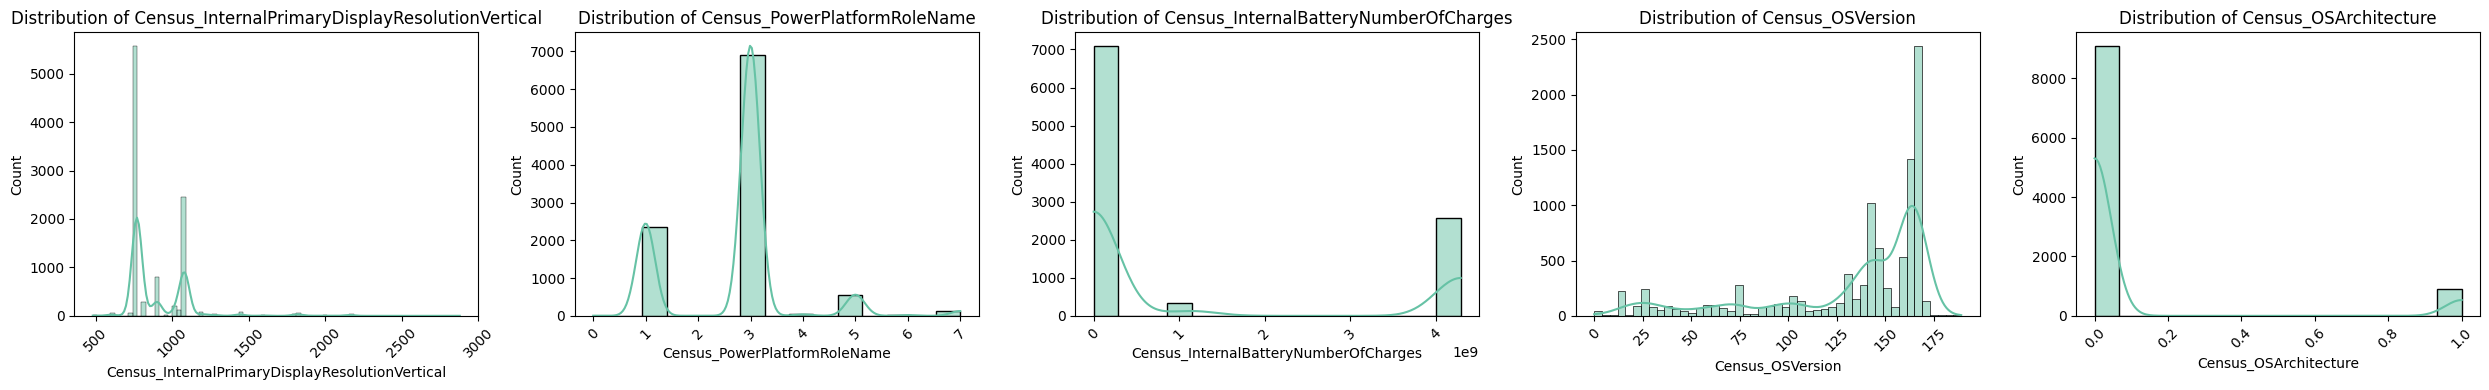

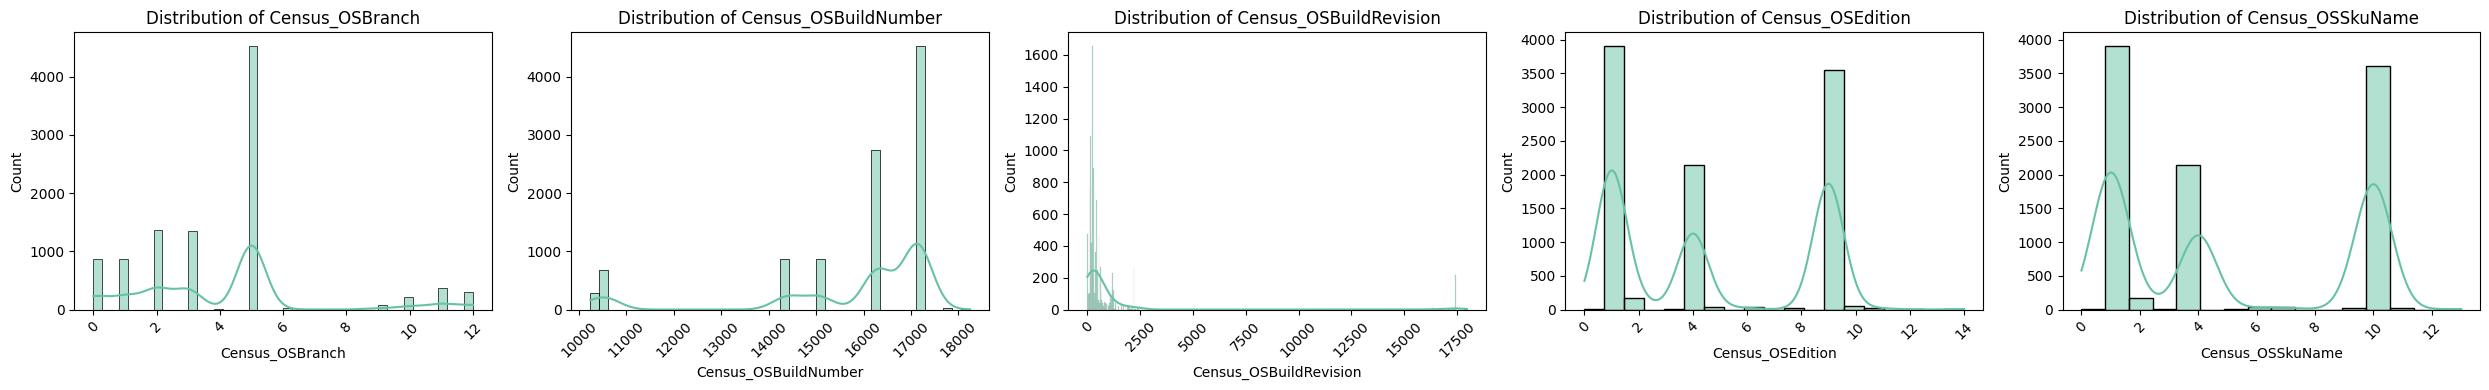

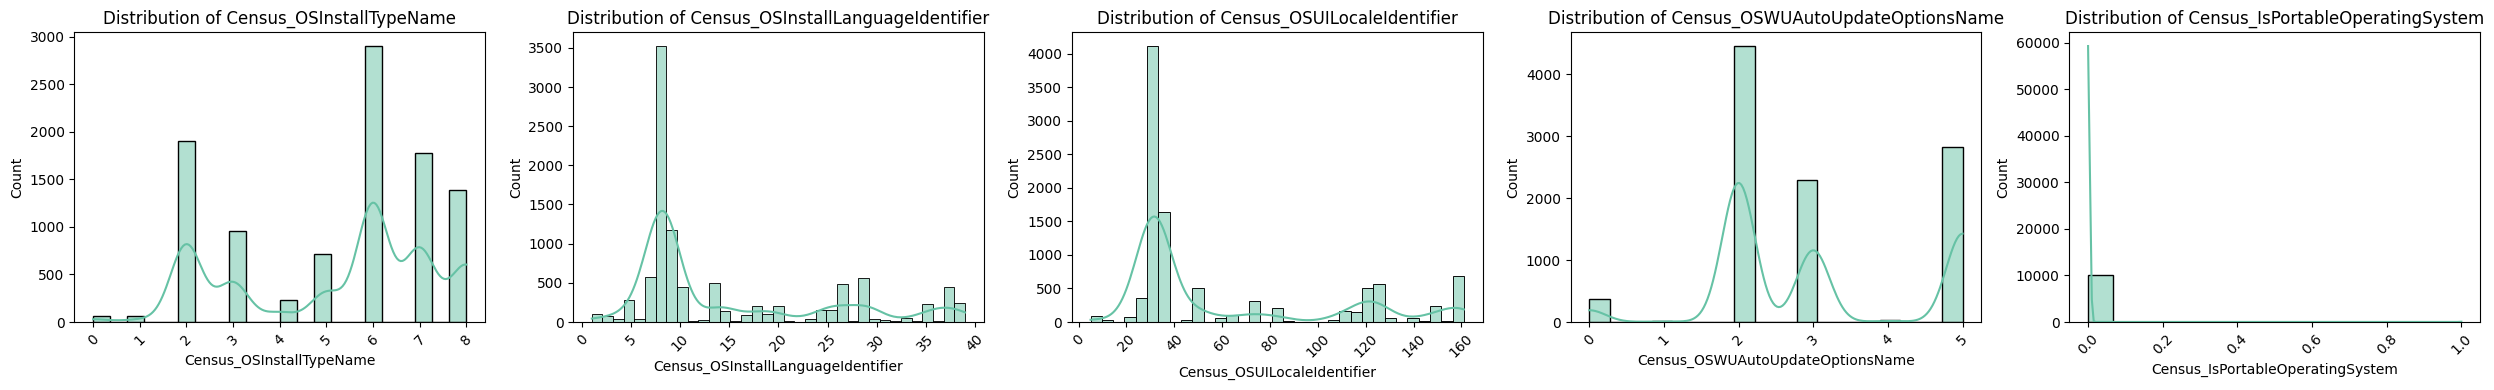

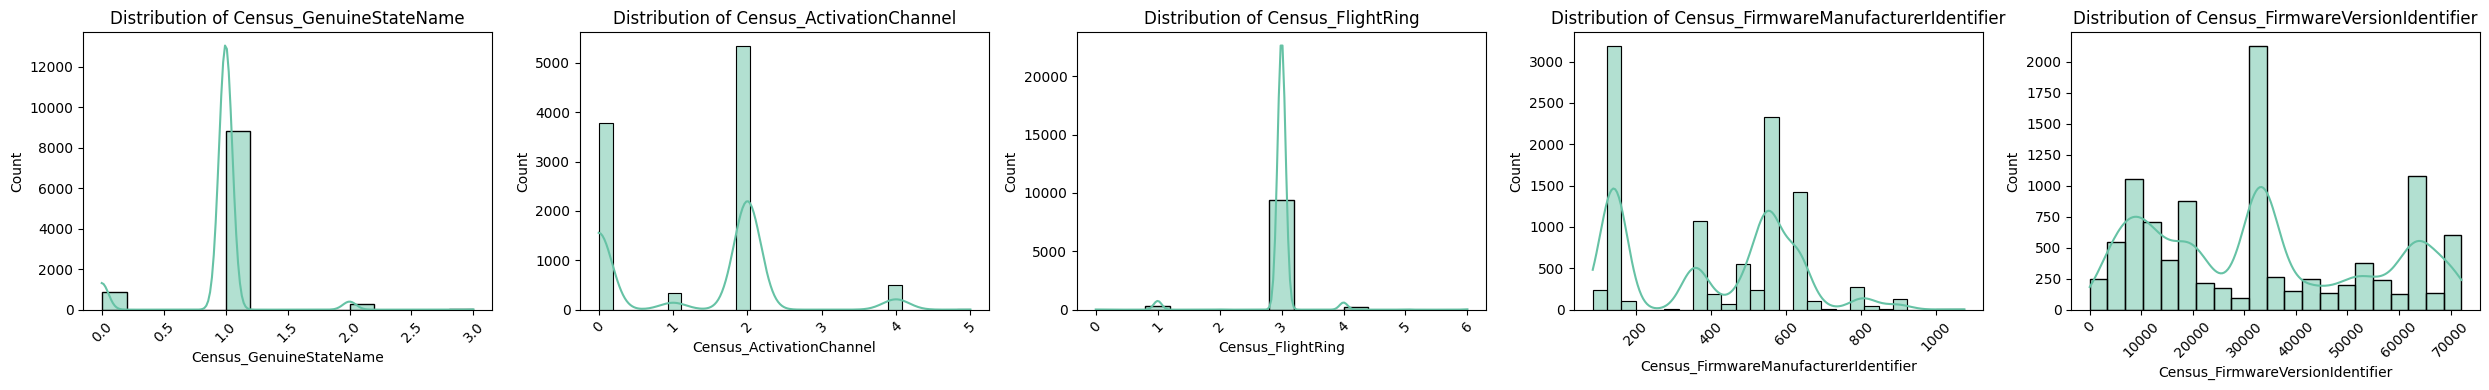

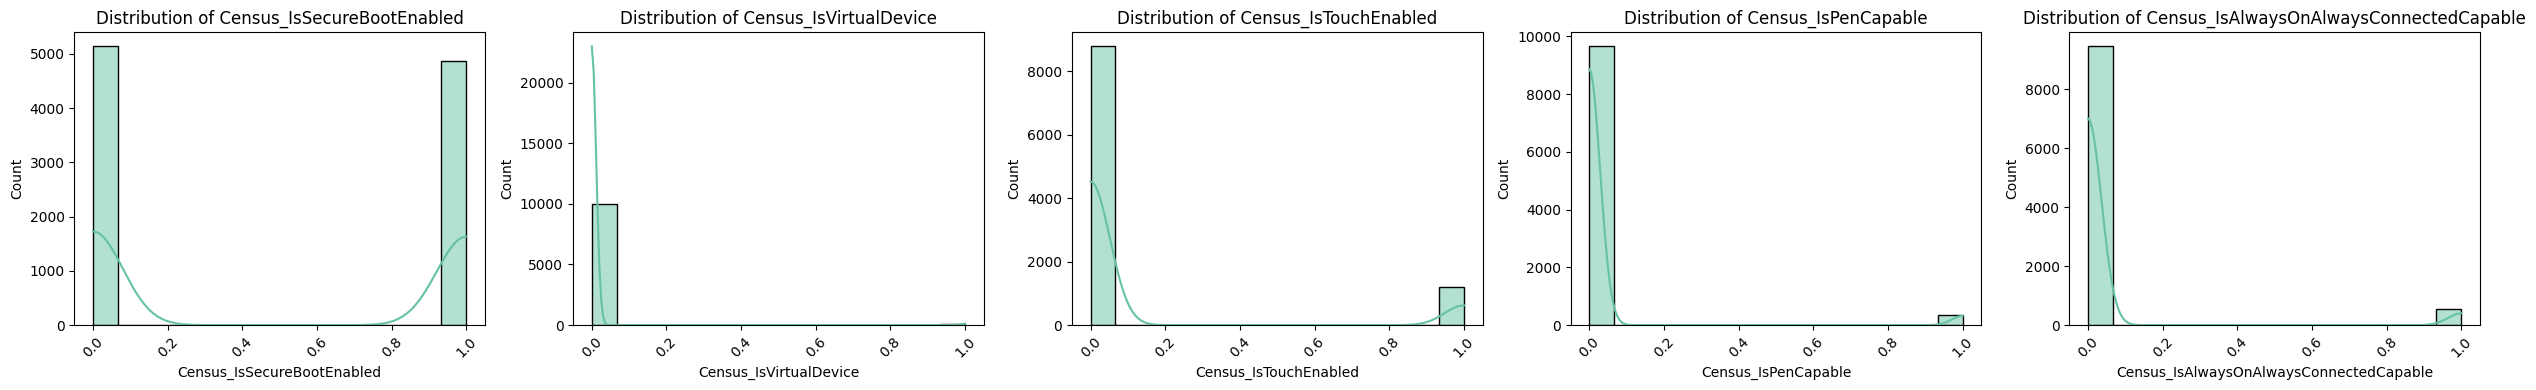

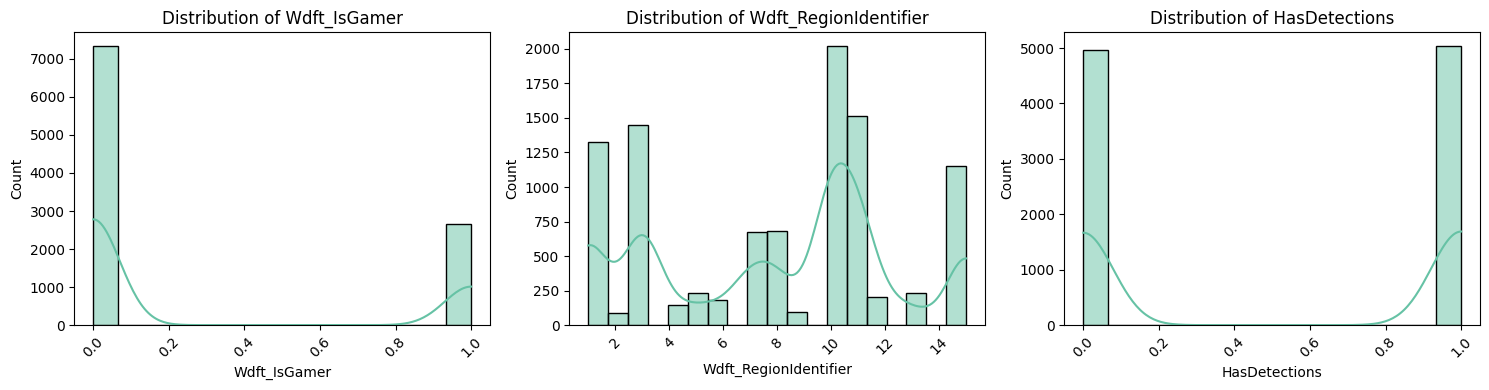

In [ ]:
# Usage
plot_numerical_features(optimized_data)


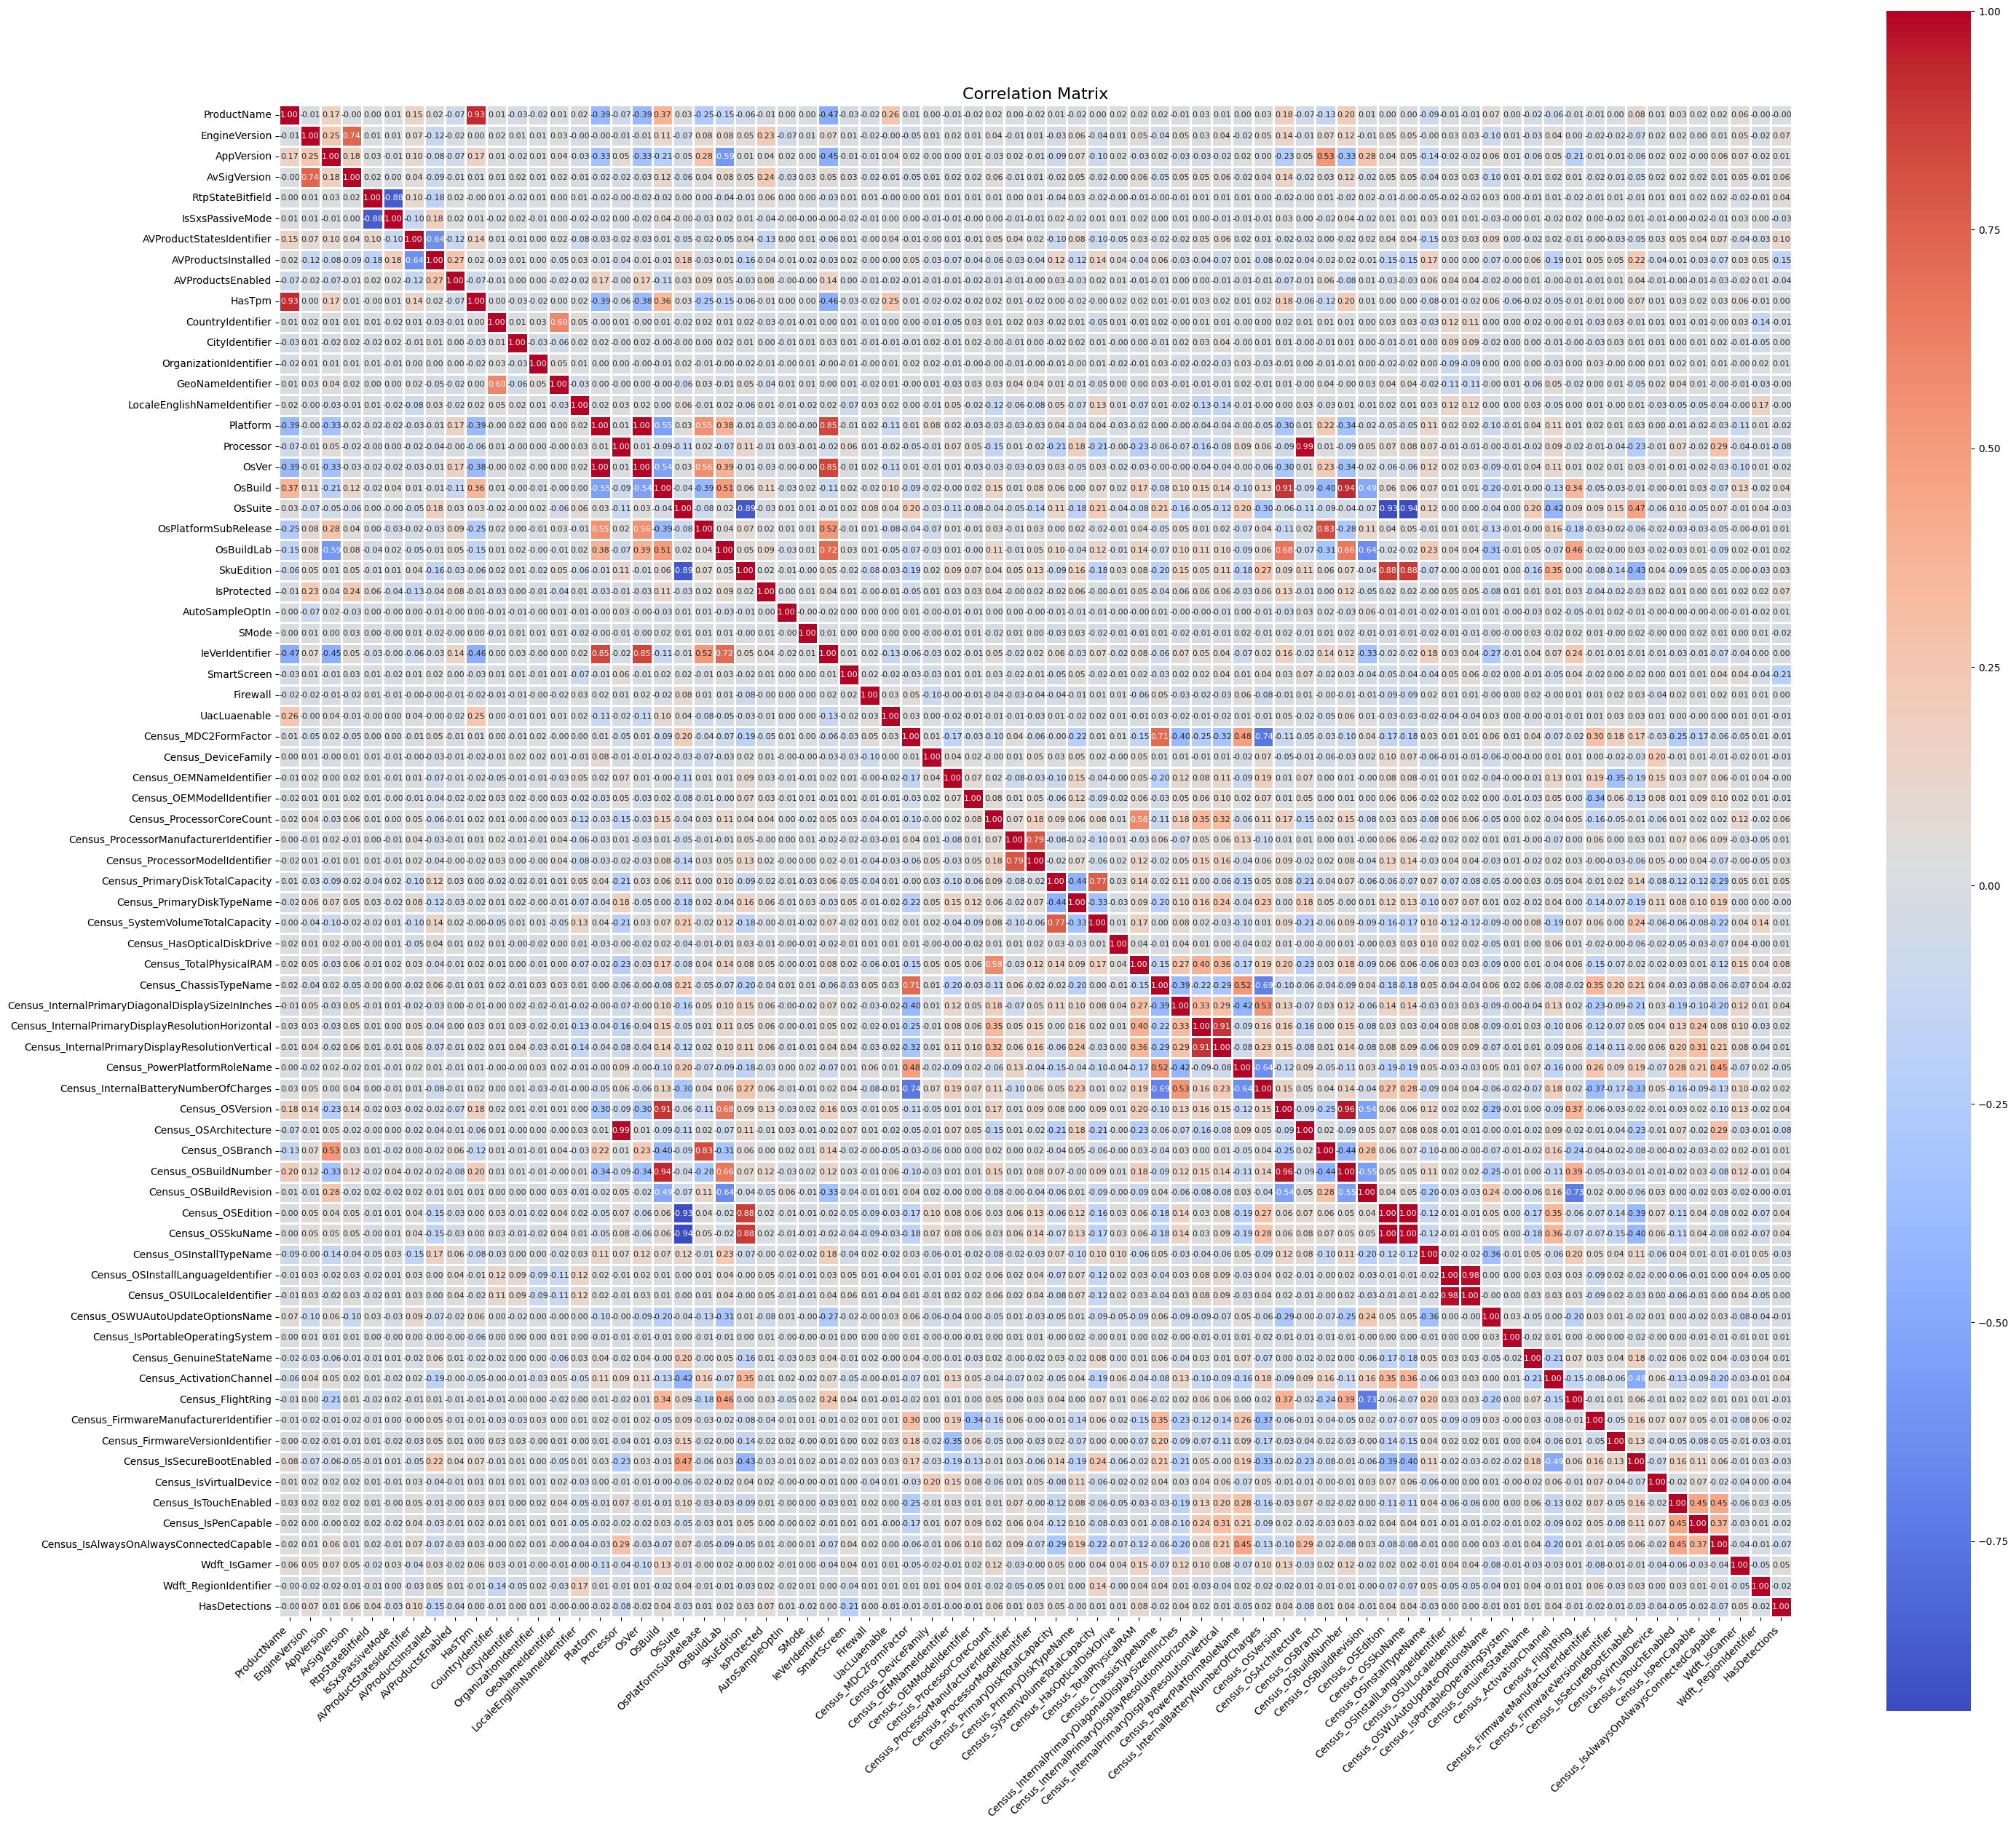

In [ ]:
# Calculate the correlation matrix
corr_matrix = optimized_data.corr()

# Plot the heatmap
plt.figure(figsize=(30, 30))  # Adjust size as needed

# Create heatmap with better visual adjustments
ax = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                 annot_kws={"size": 8},  # Font size of the numbers
                 square=True,  # Square cells
                 linewidths=1,  # Line width between cells
                 cbar_kws={"shrink": .8})  # Colorbar size

# Rotate the tick labels
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=10)  # Rotate y-axis labels

plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()

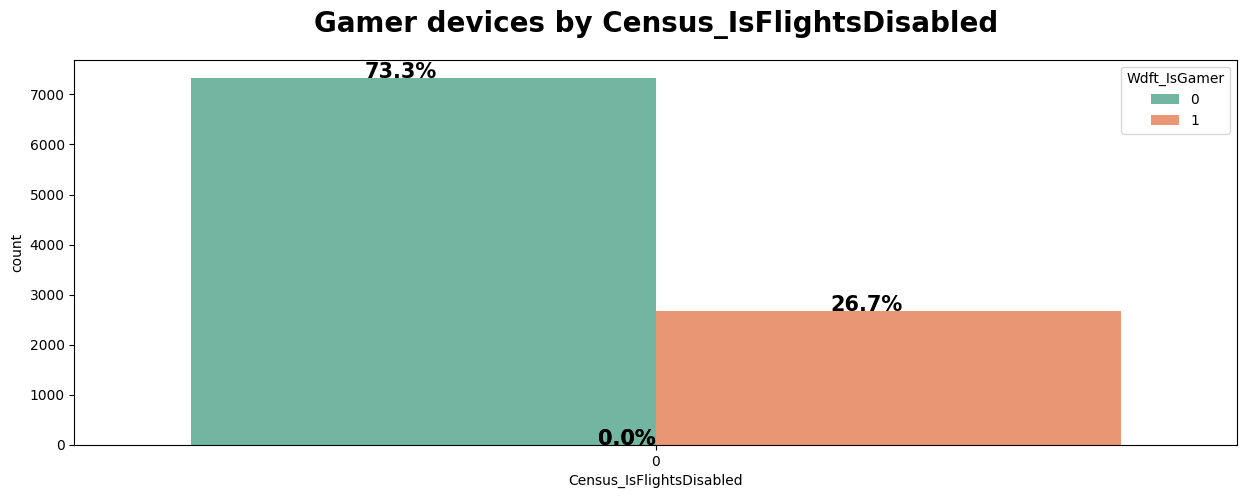

In [ ]:
countplot(optimized_data, 'Census_IsFlightsDisabled', 'Wdft_IsGamer')

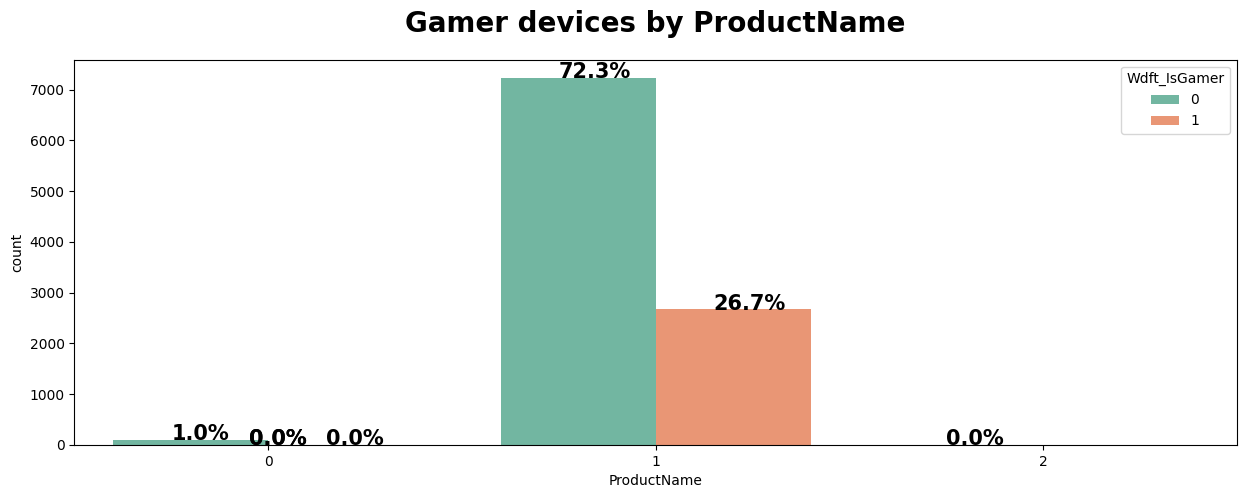

In [ ]:
countplot(optimized_data, 'ProductName', 'Wdft_IsGamer')

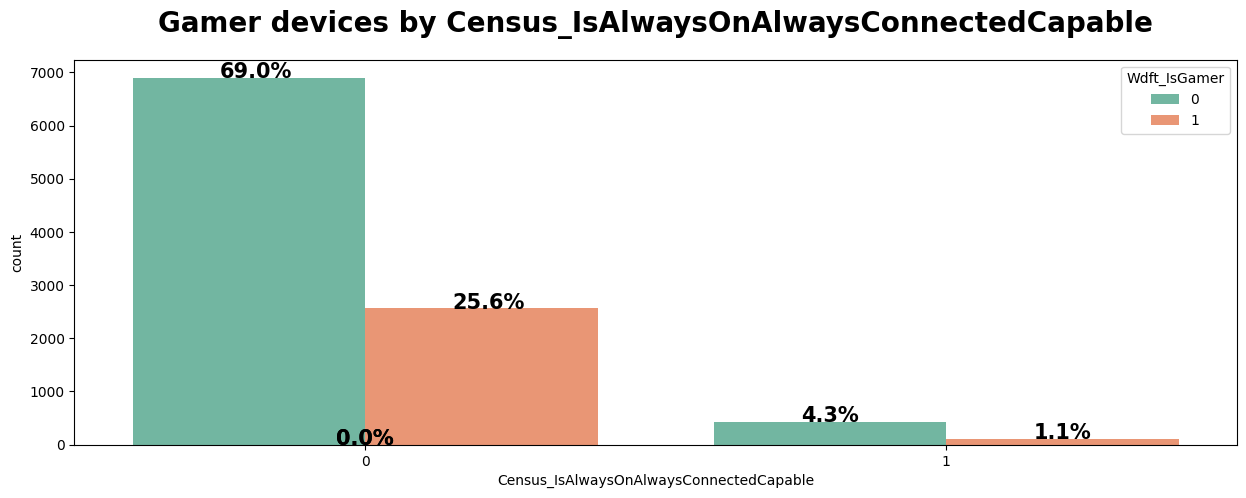

In [ ]:
countplot(optimized_data, 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer')

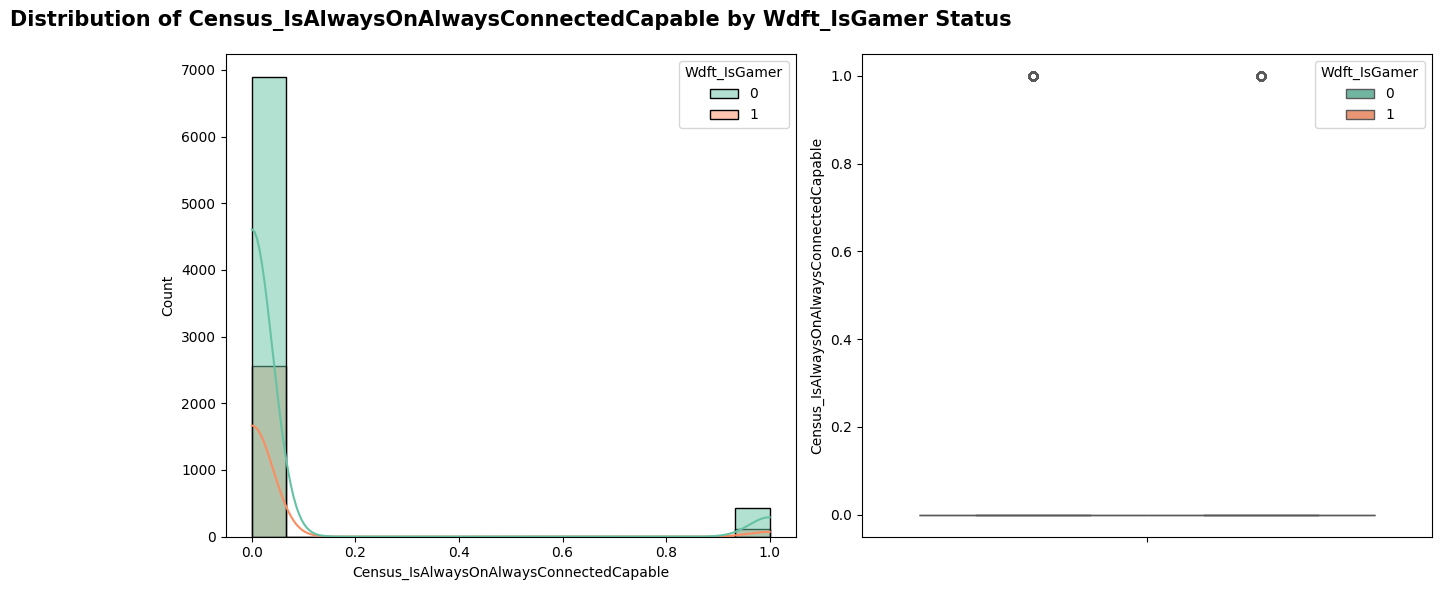

In [ ]:
continous_plot(optimized_data, 'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer')

## Data Preprocessing

### Feature Extraction

In [ ]:
# Usage example:
target_column = 'Wdft_IsGamer'  # Replace with your actual target column name
optimized_data_cleaned, removed_features = remove_zero_correlation_features(optimized_data, target_column)

print(f"Removed features with zero correlation: {removed_features}")


The shape of the new data : (10000, 64)
Removed features with zero correlation: ['OrganizationIdentifier', 'LocaleEnglishNameIdentifier', 'OsPlatformSubRelease', 'SkuEdition', 'SMode', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTypeName']


In [ ]:
num_cols = [col for col in num_cols if col not in removed_features]

## Handle Outliers

In [ ]:
optimized_data_cleaned_outliers, dropped_columns = handle_outliers_and_correlations(optimized_data_cleaned, num_cols, 'Wdft_IsGamer')
print(f"Columns dropped due to low correlation: {dropped_columns}")


Column: 'Census_OSInstallLanguageIdentifier', Outlier %: 55.63%, Correlation with Wdft_IsGamer: 0.038
----------------------------------------------------------------------------------------------------
>> Dropping column 'Census_OSInstallLanguageIdentifier' due to low correlation with Wdft_IsGamer.
---------------------------------------------------------------------------------------------------- 

Column: 'AVProductStatesIdentifier', Outlier %: 55.63%, Correlation with Wdft_IsGamer: -0.043
----------------------------------------------------------------------------------------------------
>> Dropping column 'AVProductStatesIdentifier' due to low correlation with Wdft_IsGamer.
---------------------------------------------------------------------------------------------------- 

Column: 'CityIdentifier', Outlier %: 55.63%, Correlation with Wdft_IsGamer: -0.007
----------------------------------------------------------------------------------------------------
>> Dropping column 'CityI

In [ ]:
num_cols_after_outliers = [col for col in num_cols if col not in dropped_columns]


### Handle Skewed Data

In [ ]:
optimized_data_cleaned_outliers.skew().to_frame().rename(columns={0:"Feature Skewness"})

Feature Skewness
ProductName                                                0.000000
EngineVersion                                             -4.032241
AppVersion                                                -2.365646
AvSigVersion                                              -0.673276
RtpStateBitfield                                          -6.508982
IsSxsPassiveMode                                           7.510373
AVProductsInstalled                                        1.214494
AVProductsEnabled                                          6.625049
HasTpm                                                   -34.132093
Platform                                                  34.132093
Processor                                                  2.767254
OsVer                                                      0.000000
OsBuild                                                   -0.989441
OsSuite                                                   -0.638273
OsBuildLab                                                -3.041997
IsProtected                                               -3.967783
SmartScreen                                               -2.001436
Firewall                                                  -6.913858
UacLuaenable                                             -16.326082
Census_MDC2FormFactor                                     -1.127626
Census_DeviceFamily                                       34.132093
Census_ProcessorCoreCount                                 -0.814790
Census_ProcessorManufacturerIdentifier                    -2.327020
Census_HasOpticalDiskDrive                                 3.248978
Census_TotalPhysicalRAM                                    0.840336
Census_ChassisTypeName                                    -0.785780
Census_InternalPrimaryDiagonalDisplaySizeInInches          0.625163
Census_PowerPlatformRoleName                               0.193725
Census_OSVersion                                          -1.414683
Census_OSArchitecture                                      2.775801
Census_OSBranch                                           -0.399655
Census_OSBuildNumber                                      -1.000967
Census_OSEdition                                           0.350661
Census_OSSkuName                                           0.399932
Census_OSInstallTypeName                                  -0.610767
Census_OSWUAutoUpdateOptionsName                           0.214138
Census_IsPortableOperatingSystem                          34.132093
Census_GenuineStateName                                   -1.068689
Census_ActivationChannel                                   0.167601
Census_FlightRing                                          0.709616
Census_IsSecureBootEnabled                                -0.073441
Census_IsVirtualDevice                                    14.935452
Census_IsTouchEnabled                                      2.217200
Census_IsPenCapable                                        4.825511
Census_IsAlwaysOnAlwaysConnectedCapable                    3.882392
Wdft_IsGamer                                               1.164872
HasDetections                                              0.019705

In [ ]:
optimized_data_cleaned_outliers_skeweness = remove_cols_by_skeweness(optimized_data_cleaned_outliers, 'Wdft_IsGamer')

Columns removed due to high skewness (>10) and low correlation (<0.11) with Wdft_IsGamer: ['HasTpm', 'Platform', 'UacLuaenable', 'Census_DeviceFamily', 'Census_IsPortableOperatingSystem', 'Census_IsVirtualDevice']
Shape of the dataframe after removal: (7005, 40)


In [ ]:
num_cols_final = [col for col in num_cols_after_outliers if col in optimized_data_cleaned_outliers_skeweness.columns]
cat_cols_final = [col for col in cat_cols if col in optimized_data_cleaned_outliers_skeweness.columns and col != 'Wdft_IsGamer']

len(cat_cols_final)

34

## Feature Engineering

In [ ]:
X = optimized_data_cleaned_outliers_skeweness.drop('Wdft_IsGamer', axis=1)
y = optimized_data_cleaned_outliers_skeweness['Wdft_IsGamer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_cv shape: {X_cv.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_cv shape: {y_cv.shape}")


X_train shape: (4903, 39)
X_test shape: (1051, 39)
X_cv shape: (1051, 39)
y_train shape: (4903,)
y_test shape: (1051,)
y_cv shape: (1051,)


In [ ]:
# StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_resampled.value_counts()

Wdft_IsGamer
0    3685
1    3685
Name: count, dtype: int64

In [ ]:
num_cols_needed = 3
cat_cols_needed = 20
# Pipeline for numerical features (ANOVA F-test)
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # You can add other transformers if needed
    ('anova', SelectKBest(score_func=f_classif, k=num_cols_needed))  # Select best features based on ANOVA F-test
])

# Pipeline for categorical features (Chi-squared test)
cat_pipeline = Pipeline([
    ('chi2', SelectKBest(score_func=chi2, k=cat_cols_needed))  # Select best features based on Chi-squared test
])

# Combine both pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols_final),
    ('cat', cat_pipeline, cat_cols_final)
])

In [ ]:
preprocessor.fit(X_train_resampled, y_train_resampled)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('anova', SelectKBest(k=3))]),
                                 ['Census_ProcessorCoreCount', 'OsBuild',
                                  'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                                  'Census_OSBuildNumber',
                                  'Census_TotalPhysicalRAM']),
                                ('cat',
                                 Pipeline(steps=[('chi2',
                                                  SelectKBest(k=20,
                                                              score_func=<function chi2 at 0x7af49975fac0>))]),
                                 ['...
                                  'Census_MDC2FormFactor', 'Census_OSSkuName',
                                  'SmartScreen', 'Census_IsSecureBootEnabled',
                                  'OsSuite', 'Census_OSArchitecture',
                                  'Census_IsPenCapable', 'Census_FlightRing',
                                  'IsSxsPassiveMode',
                                  'Census_HasOpticalDiskDrive',
                                  'AVProductsInstalled', 'EngineVersion',
                                  'AVProductsEnabled', 'Firewall',
                                  'Census_ChassisTypeName',
                                  'Census_ProcessorManufacturerIdentifier', ...])])

In [ ]:
# Get the selected numerical features
num_selector = preprocessor.named_transformers_['num'].named_steps['anova']
num_mask = num_selector.get_support()  # Boolean mask for selected numerical features
selected_num_cols = np.array(num_cols_final)[num_mask]  # Extract selected numerical columns

# Get the selected categorical features
cat_selector = preprocessor.named_transformers_['cat'].named_steps['chi2']
cat_mask = cat_selector.get_support()  # Boolean mask for selected categorical features
selected_cat_cols = np.array(cat_cols_final)[cat_mask]  # Extract selected categorical columns

# Output the selected columns
print("Selected Numerical Columns:", selected_num_cols)
print("Selected Categorical Columns:", selected_cat_cols)

Selected Numerical Columns: ['OsBuild' 'Census_OSBuildNumber' 'Census_TotalPhysicalRAM']
Selected Categorical Columns: ['AppVersion' 'Census_OSWUAutoUpdateOptionsName'
 'Census_OSInstallTypeName' 'Census_ActivationChannel' 'AvSigVersion'
 'Census_IsTouchEnabled' 'OsBuildLab' 'HasDetections' 'Census_OSVersion'
 'Census_IsAlwaysOnAlwaysConnectedCapable' 'Census_IsSecureBootEnabled'
 'OsSuite' 'Census_OSArchitecture' 'Census_IsPenCapable'
 'Census_HasOpticalDiskDrive' 'AVProductsInstalled'
 'Census_ChassisTypeName' 'Census_ProcessorManufacturerIdentifier'
 'Processor' 'Census_OSBranch']


In [ ]:
# Define your model parameters
model_params = {
    'Random Forest': {
        'model': RandomForestClassifier(class_weight='balanced'),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'colsample_bytree': [0.7, 0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'num_leaves': [31, 40, 50],
            'boosting_type': ['gbdt', 'dart']
        }
    }
}

In [ ]:
# Function to estimate the time taken for one iteration of RandomizedSearchCV
def estimate_pipeline_time(model_name, n_iter=1):
    # Start time for the small run
    start_time = time.time()

    # Example for 'Random Forest'; you can loop through other models similarly
    pipeline = Pipeline([
        ('preprocessing', preprocessor)  # Your preprocessor pipeline
    ])

    X_train_processed = pipeline.fit_transform(X_train,y_train)

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

    # Initialize the RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model_params[model_name]['model'],
        param_distributions=model_params[model_name]['params'],
        n_iter=n_iter,
        cv=stratified_kfold,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )

    # Fit the search
    random_search.fit(X_train_resampled, y_train_resampled)

    # End time for the small run
    end_time = time.time()

    # Time taken for n_iter iterations
    elapsed_time = end_time - start_time
    print(f"Time taken for {n_iter} iterations: {elapsed_time:.2f} seconds")

    # Return the time taken for a single iteration
    return elapsed_time / n_iter

# Estimate the time for a small number of iterations
time_per_iter = estimate_pipeline_time("Random Forest", n_iter=2)  # Running on a small subset (e.g., 2 iterations)

# Predict total time for full run
n_iters = 10  # Number of iterations you plan to use in RandomizedSearchCV
total_time_estimate = time_per_iter * n_iters * stratified_kfold.get_n_splits()

# Print estimated total time
print(f"Estimated total time for {n_iters} iterations and {stratified_kfold.get_n_splits()} folds: {total_time_estimate:.2f} seconds")

# Optional: Running a full model


Time taken for 2 iterations: 24.40 seconds
Estimated total time for 10 iterations and 5 folds: 610.01 seconds


Running model: Random Forest


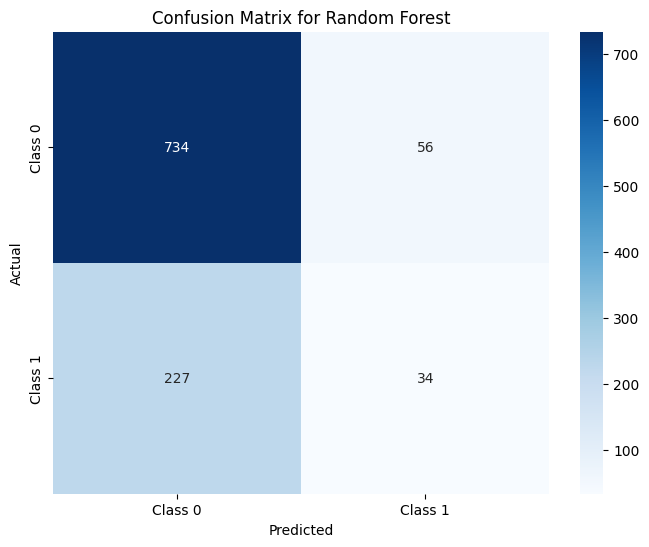

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       790
           1       0.38      0.13      0.19       261

    accuracy                           0.73      1051
   macro avg       0.57      0.53      0.52      1051
weighted avg       0.67      0.73      0.68      1051

ROC AUC for Random Forest: 0.6063
Train Accuracy: 0.9300
Test Accuracy: 0.7307
Cross-Validation Accuracies: [0.82822252 0.82442334 0.82401628 0.82035278 0.83337856 0.8339213
 0.83297151 0.8302578  0.83270014 0.82333786]
--------------------------------------------------
Running model: XGBoost


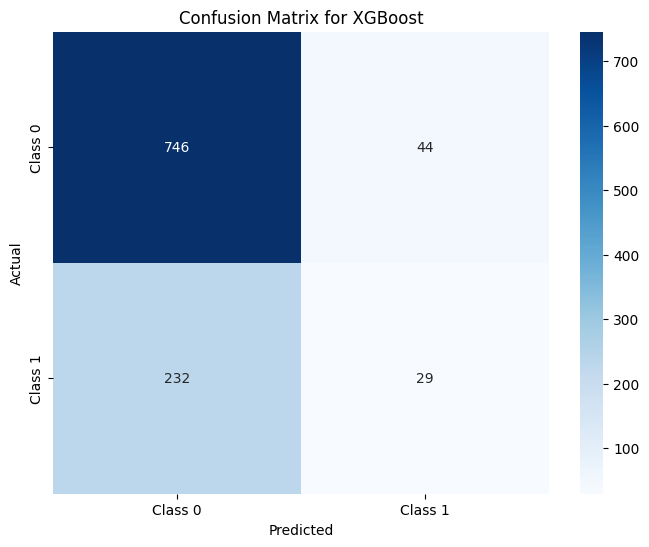

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       790
           1       0.40      0.11      0.17       261

    accuracy                           0.74      1051
   macro avg       0.58      0.53      0.51      1051
weighted avg       0.67      0.74      0.68      1051

ROC AUC for XGBoost: 0.6362
Train Accuracy: 0.8512
Test Accuracy: 0.7374
Cross-Validation Accuracies: [0.80746269 0.79145183 0.82075984 0.81438263 0.82333786 0.80447761
 0.8238806  0.81994573 0.81424695 0.82550882]
--------------------------------------------------
Running model: LightGBM
[LightGBM] [Info] Number of positive: 3685, number of negative: 3685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4855
[LightGBM] [Info] N

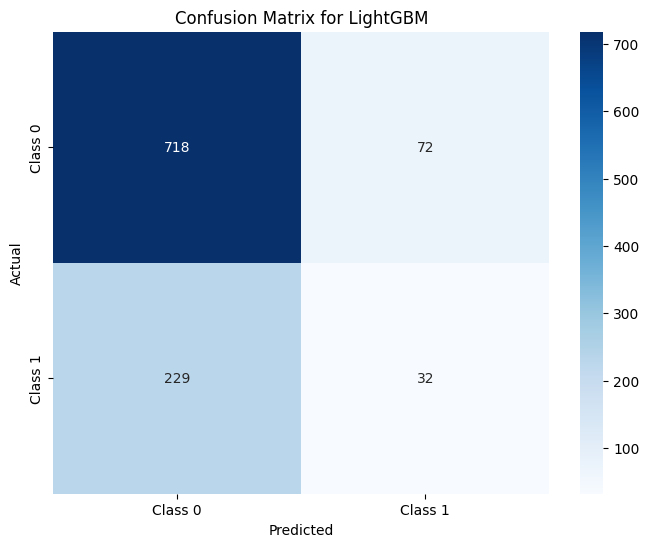

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       790
           1       0.31      0.12      0.18       261

    accuracy                           0.71      1051
   macro avg       0.53      0.52      0.50      1051
weighted avg       0.65      0.71      0.66      1051

ROC AUC for LightGBM: 0.6064
Train Accuracy: 0.9056
Test Accuracy: 0.7136
Cross-Validation Accuracies: [0.81641791 0.8238806  0.82455902 0.81913161 0.82170963 0.81913161
 0.8119403  0.81750339 0.81953867 0.80189959]
--------------------------------------------------
{'Random Forest': {'Best Hyperparameters': {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}, 'Best Cross-Validation Accuracy': 0.833921302578019, 'Train Accuracy': 0.9299864314789688, 'Test Accuracy': 0.730732635585157, 'ROC AUC': 0.6062781900189146, 'Classification Report': {'0': {'precision': 0.7637877211238293, 'recall': 0.92911

In [ ]:
def run_model_search():
    # Store results
    results = {}

    for model_name, mp in model_params.items():
        print(f"Running model: {model_name}")

        # Initialize the pipeline with preprocessing
        pipeline = Pipeline([
            ('preprocessing', preprocessor)  # Your existing preprocessor pipeline
        ])

        # Fit the preprocessing pipeline and transform the data
        X_train_processed = pipeline.fit_transform(X_train, y_train)

        # Apply SMOTE
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

        # Initialize RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=mp['model'],
            param_distributions=mp['params'],
            n_iter=10,
            cv=stratified_kfold,
            scoring='accuracy',
            random_state=42,
            n_jobs=-1
        )

        # Fit RandomizedSearchCV
        random_search.fit(X_train_resampled, y_train_resampled)

        # Get the best model
        best_model = random_search.best_estimator_

        # Predict on test data
        X_test_processed = pipeline.transform(X_test)
        y_test_pred = best_model.predict(X_test_processed)

        # Classification report for test set
        class_report = classification_report(y_test, y_test_pred, output_dict=True)

        # ROC AUC score (requires probability estimates)
        y_test_prob = best_model.predict_proba(X_test_processed)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_prob)

        # Accuracy scores
        train_accuracy = accuracy_score(y_train_resampled, best_model.predict(X_train_resampled))
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Cross-validation accuracy scores
        cv_scores = random_search.cv_results_['mean_test_score']

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_test_pred)

        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Print results
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_test_pred))
        print(f"ROC AUC for {model_name}: {roc_auc:.4f}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Cross-Validation Accuracies: {cv_scores}")
        print("-" * 50)

        # Save results
        results[model_name] = {
            'Best Hyperparameters': random_search.best_params_,
            'Best Cross-Validation Accuracy': random_search.best_score_,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'ROC AUC': roc_auc,
            'Classification Report': class_report,
            'Cross-Validation Scores': cv_scores
        }


    return results


model_results = run_model_search()
print(model_results)


In [ ]:
!pip install mlflow --quiet
!pip install pyngrok --quiet

In [ ]:
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])

<Popen: returncode: None args: ['mlflow', 'ui', '--backend-store-uri', 'sqli...>

In [ ]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
# mlflow will create an experiment if it doesn't exist
mlflow.set_experiment("Microsoft Malware Detection")

2024/09/18 13:54:01 INFO mlflow.tracking.fluent: Experiment with name 'Microsoft Malware Detection' does not exist. Creating a new experiment.


<Experiment: artifact_location='/content/mlruns/1', creation_time=1726667641902, experiment_id='1', last_update_time=1726667641902, lifecycle_stage='active', name='Microsoft Malware Detection', tags={}>

In [56]:
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()
port=5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········
 * ngrok tunnel "https://cf6c-35-243-208-69.ngrok-free.app" -> "http://127.0.0.1:5000"


In [ ]:
plot_names = ['smote', 'raw', 'class weights']


In [53]:
def run_single_model_with_experiments(model_name, X_train, y_train, X_test, y_test, preprocessor, stratified_kfold, plot_name):
    if model_name not in model_params:
        raise ValueError(f"Model {model_name} is not defined in model_params.")
    print(f"Running model: {model_name} with {plot_name}")

    # Get the model and parameters from model_params
    model = model_params[model_name]['model']
    param_distributions = model_params[model_name]['params']

    # Construct a meaningful run name
    run_name = f"{model_name} - {plot_name}"

    # Log experiment
    with mlflow.start_run(run_name=run_name) as run:
        # Add tags to clarify the run
        mlflow.set_tag("model_name", model_name)
        mlflow.set_tag("plot_name", plot_name)
        mlflow.set_tag("experiment_type", plot_name)

        # Initialize the pipeline with preprocessing
        pipeline = Pipeline([
            ('preprocessing', preprocessor)  # Your existing preprocessor pipeline
        ])

        # Fit the preprocessing pipeline and transform the data
        X_train_processed = pipeline.fit_transform(X_train, y_train)

        # Apply SMOTE if plot_name is 'smote'
        if plot_name == 'smote':
            smote = SMOTE(random_state=42)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

        # Apply class weights if plot_name is 'class weights'
        elif plot_name == 'class weights':
            # Get class distribution
            class_weights = dict(zip(*np.unique(y_train, return_counts=True)))
            total = sum(class_weights.values())
            class_weights = {k: total/v for k, v in class_weights.items()}  # Inverse of frequency

            # For models that support 'class_weight' parameter, update the model
            if hasattr(model, 'class_weight'):
                model.set_params(class_weight=class_weights)

            X_train_resampled, y_train_resampled = X_train_processed, y_train

        else:
            X_train_resampled, y_train_resampled = X_train_processed, y_train

        # Initialize RandomizedSearchCV
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_distributions,
            n_iter=10,
            cv=stratified_kfold,
            scoring='accuracy',
            random_state=42,
            n_jobs=-1
        )

        # Fit RandomizedSearchCV
        random_search.fit(X_train_resampled, y_train_resampled)

        # Get the best model
        best_model = random_search.best_estimator_

        # Predict on test data
        X_test_processed = pipeline.transform(X_test)
        y_test_pred = best_model.predict(X_test_processed)

        # Classification report for test set
        class_report = classification_report(y_test, y_test_pred, output_dict=True)
        f1_scores = {cls: class_report[cls]['f1-score'] for cls in class_report if cls.isdigit()}
        precision_scores = {cls: class_report[cls]['precision'] for cls in class_report if cls.isdigit()}
        recall_scores = {cls: class_report[cls]['recall'] for cls in class_report if cls.isdigit()}

        # ROC AUC score (requires probability estimates)
        y_test_prob = best_model.predict_proba(X_test_processed)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_prob)

        # Accuracy scores
        train_accuracy = accuracy_score(y_train_resampled, best_model.predict(X_train_resampled))
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Cross-validation accuracy scores
        cv_scores = random_search.cv_results_['mean_test_score']

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_test_pred)

        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.savefig(f'confusion_matrix_{model_name}_{plot_name}.png')
        plt.close()

        # Plot ROC AUC curve
        plt.figure(figsize=(8, 6))
        fpr, tpr, _ = roc_curve(y_test, y_test_prob)
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
        plt.legend(loc='lower right')
        plt.savefig(f'roc_curve_{model_name}_{plot_name}.png')
        plt.close()

        # Log metrics to MLflow
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("plot_name", plot_name)
        mlflow.log_param("best_params", random_search.best_params_)
        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("test_accuracy", test_accuracy)
        mlflow.log_metric("roc_auc", roc_auc)
        for cls, f1 in f1_scores.items():
            mlflow.log_metric(f"f1_score_class_{cls}", f1)
        for cls, precision in precision_scores.items():
            mlflow.log_metric(f"precision_class_{cls}", precision)
        for cls, recall in recall_scores.items():
            mlflow.log_metric(f"recall_class_{cls}", recall)
        mlflow.log_artifact(f'confusion_matrix_{model_name}_{plot_name}.png')
        mlflow.log_artifact(f'roc_curve_{model_name}_{plot_name}.png')

        print(f"Logged metrics and plots for {model_name} with {plot_name}.")

# Example call (make sure to define your X_train, y_train, X_test, y_test, preprocessor, and stratified_kfold)
run_single_model_with_experiments(
    model_name='Random Forest',
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    preprocessor=preprocessor,
    stratified_kfold=stratified_kfold,
    plot_name='smote'
)


Running model: Random Forest with smote
Logged metrics and plots for Random Forest with smote.


In [ ]:
# Example call (make sure to define your X_train, y_train, X_test, y_test, preprocessor, and stratified_kfold)
run_single_model_with_experiments(
    model_name='Random Forest',
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    preprocessor=preprocessor,
    stratified_kfold=stratified_kfold,
    plot_name='smote'
)

In [ ]:
# Example call (make sure to define your X_train, y_train, X_test, y_test, preprocessor, and stratified_kfold)
run_single_model_with_experiments(
    model_name='XGBoost',
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    preprocessor=preprocessor,
    stratified_kfold=stratified_kfold,
    plot_name='smote'
)

Running model: XGBoost with smote
Logged metrics and plots for XGBoost with smote.


In [ ]:
# Example call (make sure to define your X_train, y_train, X_test, y_test, preprocessor, and stratified_kfold)
run_single_model_with_experiments(
    model_name='LightGBM',
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    preprocessor=preprocessor,
    stratified_kfold=stratified_kfold,
    plot_name='smote'
)

Running model: LightGBM with smote
[LightGBM] [Info] Number of positive: 3685, number of negative: 3685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4855
[LightGBM] [Info] Number of data points in the train set: 7370, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Logged metrics and plots for LightGBM with smote.


In [54]:
run_single_model_with_experiments(
    model_name='Random Forest',
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    preprocessor=preprocessor,
    stratified_kfold=stratified_kfold,
    plot_name='class weights'
)


Running model: Random Forest with class weights
Logged metrics and plots for Random Forest with class weights.


# Runs Output

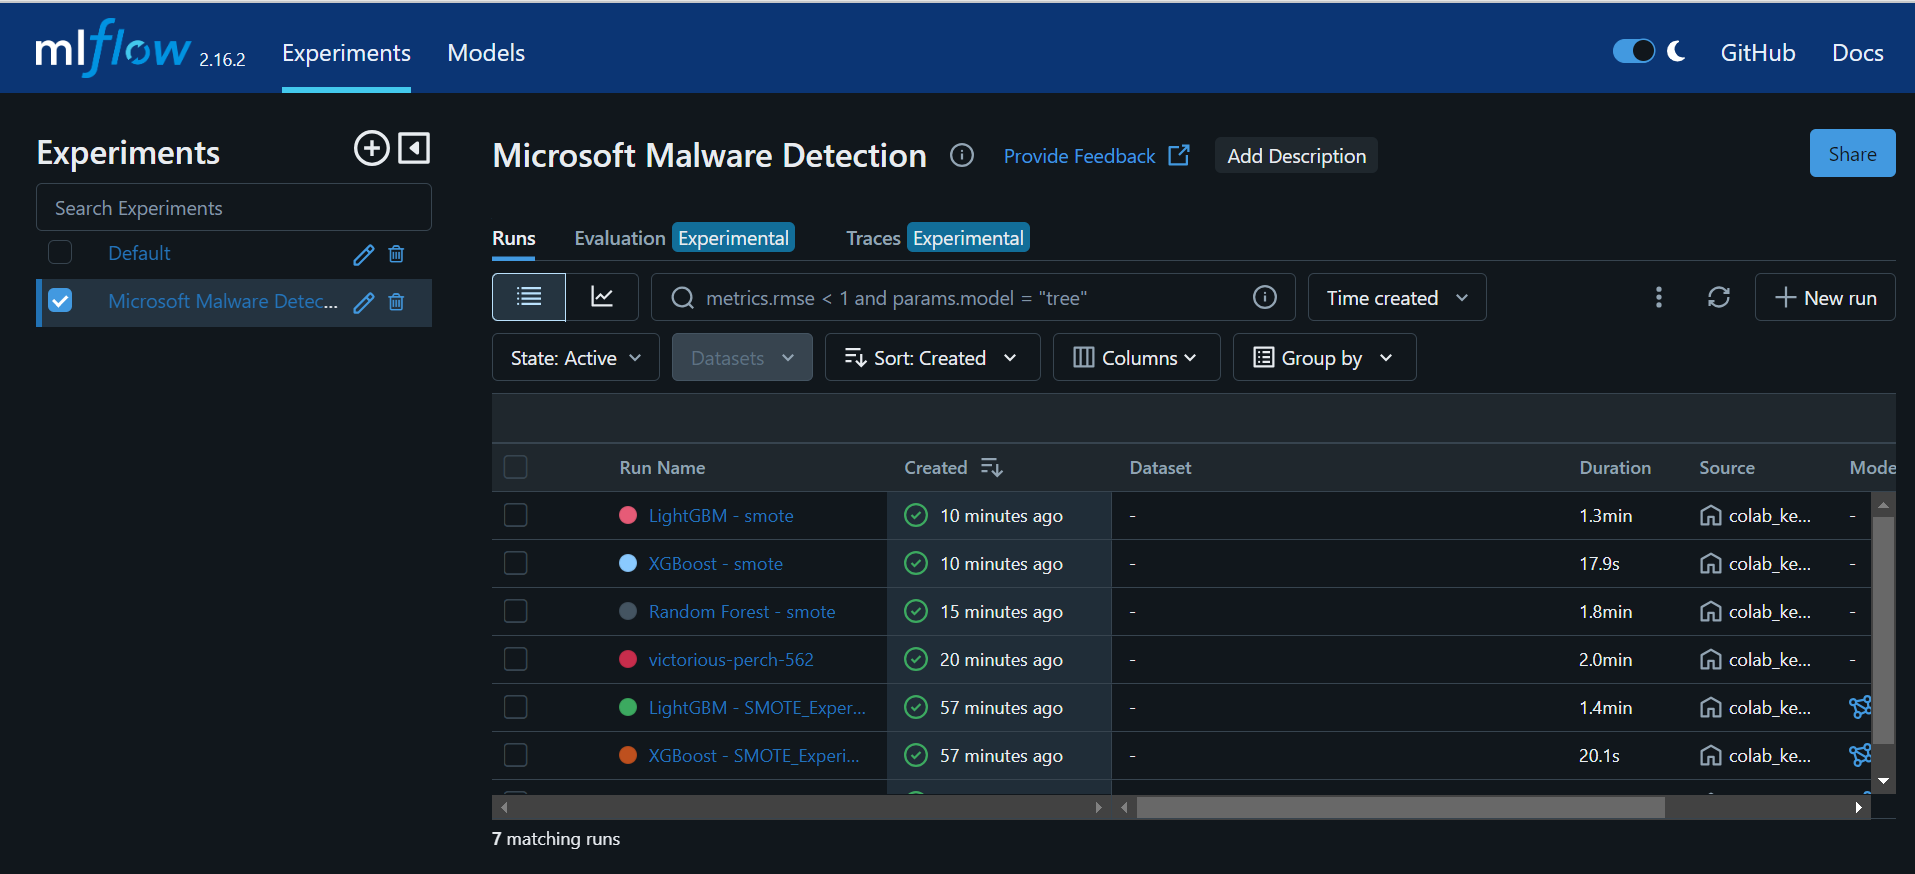